Download Data of McParland et al.
===================

Make sure that `Seurat` is installed since `HumanLiver.Rdata` has dependency on it.
(For more information, see https://github.com/BaderLab/HumanLiver)

In [8]:
system('cd data;git clone https://github.com/BaderLab/HumanLiver',intern=TRUE)

[1] "Cloning into 'HumanLiver'..."

# Load downloaded data
the data is of seurat object

In [1]:
load("data/HumanLiver/inst/liver/HumanLiver.RData")

# Data Extraction

In [241]:
library(Matrix)
library(Seurat)
library(scClustViz)

In [3]:
dir.create('data/HumanLiver_extract')

Warning message in dir.create("data/HumanLiver_extract"):
“'data/HumanLiver_extract'는 이미 존재합니다”


In [4]:
HumanLiverSeurat

An object of class Seurat 
20007 features across 8444 samples within 1 assay 
Active assay: RNA (20007 features, 6922 variable features)
 2 dimensional reductions calculated: pca, tsne

In [5]:
HumanLiverSeurat[['RNA']]

Assay data with 20007 features for 8444 cells
Top 10 variable features:
 APOC3, APOA2, ORM1, ALB, HP, APOC1, SAA1, TTR, FGA, APOA1 

In [12]:
writeMM(HumanLiverSeurat[['RNA']]@counts,"data/HumanLiver_extract/HumanLiver.data.counts.mm")
#writeMM(HumanLiverSeurat[['RNA']]@data,"data/HumanLiver_extract/HumanLiver.data.mm")

NULL

In [13]:
write.table(as.matrix(rownames(HumanLiverSeurat[['RNA']]@data)),'data/HumanLiver_extract/HumanLiver.data.row',row.names=FALSE, col.names=FALSE)

In [14]:
write.table(as.matrix(colnames(HumanLiverSeurat[['RNA']]@data)),'data/HumanLiver_extract/HumanLiver.data.col',row.names=FALSE, col.names=FALSE)

In [38]:
meta_data=cbind(HumanLiverSeurat@meta.data,Embeddings(HumanLiverSeurat,reduction="tsne"))
write.table(meta_data,'data/HumanLiver_extract/HumanLiver.metadata.tsv',row.names=TRUE, col.names=TRUE,sep='\t')
#write.table(HumanLiverSeurat@active.ident,'data/extract/HumanLiver.activeident.tsv',row.names=TRUE, col.names=TRUE,sep='\t')

In [24]:
write.table(ClusterNames(sCVdL$res.0.8),'data/HumanLiver_extract/HumanLiver.clusterid_to_clustername.tsv',row.names=TRUE, col.names=FALSE,sep='\t')

In [22]:
#write.table(attr(sCVdL$res.0.8@Clusters,"cellMarkers"),'data/HumanLiver_extract/HumanLiver.clustername2marker.tsv',row.names=TRUE, col.names=FALSE,sep='\t')

[1] 40

In [67]:
HumanLiverSeurat_neighbors=FindNeighbors(HumanLiverSeurat)

Computing nearest neighbor graph

Computing SNN



In [100]:
HumanLiverSeurat_neighbors2=FindNeighbors(HumanLiverSeurat,dims=1:dim(Embeddings(HumanLiverSeurat))[2])
HumanLiverSeurat_neighbors2_clusters=FindClusters(HumanLiverSeurat_neighbors2)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8444
Number of edges: 358601

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9121
Number of communities: 22
Elapsed time: 0 seconds


In [ ]:
HumanLiverSeurat_neighbors2_clusters

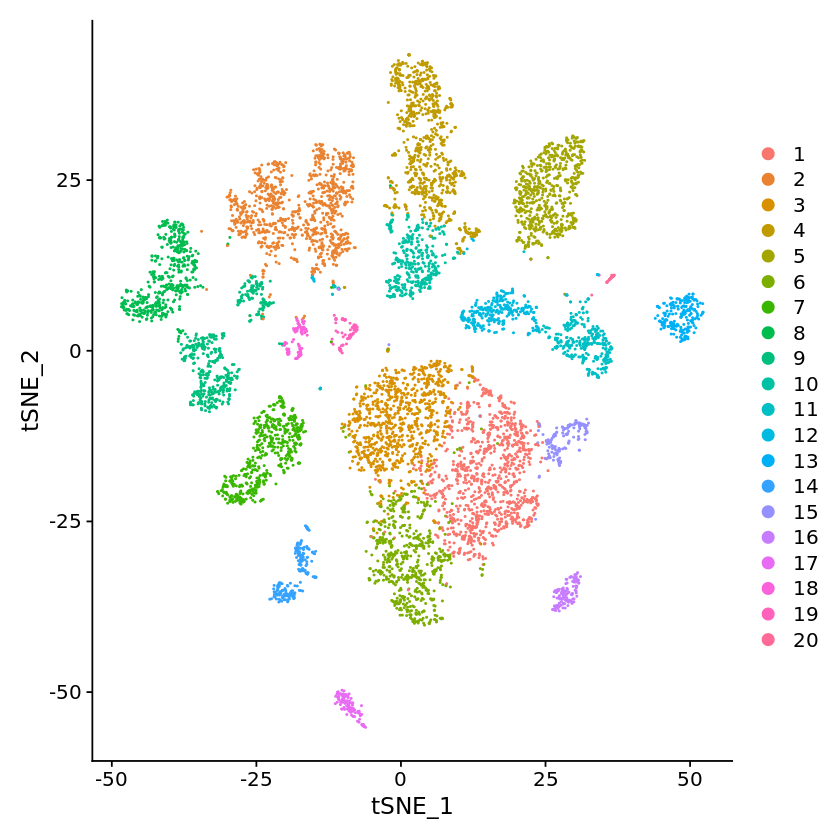

In [108]:
DimPlot(HumanLiverSeurat_neighbors2,reduction='tsne')

In [101]:
DimPlot(HumanLiverSeurat_neighbors2_clusters,reduction='tsne')

In [109]:
slotNames(HumanLiverSeurat_neighbors2_clusters)
#RNA_snn_res.0.8	seurat_clusters
HumanLiverSeurat_neighbors2_clusters@meta.data$RNA_snn_res.0.8

[1] "assays"       "meta.data"    "active.assay" "active.ident" "graphs"      
 [6] "neighbors"    "reductions"   "project.name" "misc"         "version"     
[11] "commands"     "tools"

[1] 13 18 13 10 5  3  5  10 11 8  3  11 13 9  8  3  11 5  3  13 10 10 13 5 
  [25] 6  15 11 3  13 11 13 13 6  3  13 11 11 3  13 11 6  8  5  14 15 19 10 13
  [49] 15 13 11 5  5  15 3  10 10 11 8  13 3  6  11 5  13 6  5  10 11 15 10 10
  [73] 13 13 8  3  13 13 12 15 15 10 8  11 5  11 3  8  9  5  6  3  15 3  11 6 
  [97] 11 10 3  16 10 3  11 11 10 15 10 17 21 3  12 11 3  11 15 10 3  5  7  13
 [121] 3  3  5  13 8  6  3  13 5  3  15 3  15 9  11 5  8  12 15 13 3  5  13 5 
 [145] 18 13 6  6  3  3  10 9  8  11 3  5  15 10 3  15 11 9  5  13 15 13 15 8 
 [169] 8  8  13 8  3  9  11 13 10 5  15 6  5  13 3  11 8  13 8  5  13 13 8  15
 [193] 15 3  13 15 11 13 8  13 5  5  8  10 8  3  6  14 6  3  9  5  21 3  13 15
 [217] 5  16 13 9  9  13 8  13 3  3  11 5  3  15 13 9  13 13 8  11 3  13 11 5 
 [241] 9  20 3  13 19 13 6  5  18 15 11 15 3  13 13 3  13 8  3  5  10 3  3  10
 [265] 10 5  3  5  15 11 6  11 11 11 3  3  7  13 15 3  13 10 5  11 15 18 11 13
 [289] 3  6  13 13 3  5  13 13 6  10 5  10 3  5  6  21 13 10 3  6  10 13 3  15
 [313] 16 3  21 3  13 3  5  13 11 13 10 9  3  12 3  10 13 10 5  6  13 6  5  9 
 [337] 11 5  13 6  12 9  17 18 8  15 11 10 6  3  3  5  5  15 13 6  13 11 3  3 
 [361] 11 8  8  10 11 6  8  3  15 15 3  13 13 13 9  13 15 3  5  8  15 15 8  11
 [385] 5  11 15 9  6  6  10 15 5  15 10 8  8  5  5  13 11 13 15 11 3  5  6  15
 [409] 13 13 8  13 19 19 13 3  5  15 13 10 8  3  13 13 9  3  3  11 6  13 10 3 
 [433] 10 3  12 13 13 3  8  13 15 11 5  3  11 11 6  15 10 13 15 3  13 15 10 8 
 [457] 17 13 3  3  8  9  3  3  18 10 15 12 10 9  11 9  3  6  12 13 8  8  3  10
 [481] 13 5  19 3  6  12 5  13 10 3  19 8  6  3  3  11 13 5  3  15 13 5  3  3 
 [505] 11 3  12 13 8  15 13 3  8  8  13 13 12 15 8  3  13 5  15 3  9  8  5  5 
 [529] 9  9  5  10 10 11 6  6  8  6  3  6  16 10 15 3  3  3  13 3  10 3  12 11
 [553] 13 5  19 3  5  21 11 8  14 10 3  5  9  8  7  13 15 3  6  11 10 3  13 8 
 [577] 5  11 11 10 14 14 13 13 16 3  15 3  11 3  5  3  3  8  8  6  11 9  15 13
 [601] 10 13 15 13 11 17 13 13 5  5  5  6  5  13 8  11 10 6  10 11 6  3  15 15
 [625] 11 8  13 11 10 5  10 13 5  13 6  3  5  13 3  5  11 15 13 5  5  9  5  15
 [649] 8  6  8  9  8  13 13 13 10 8  15 6  3  6  3  18 13 11 13 19 3  11 6  3 
 [673] 3  11 3  6  9  19 11 5  11 5  15 3  8  3  9  5  13 10 3  5  3  15 13 1 
 [697] 13 6  10 5  6  13 3  10 15 13 5  10 8  8  11 13 13 13 5  3  6  14 15 13
 [721] 3  5  13 8  8  13 8  3  10 6  8  13 13 10 3  3  3  3  11 3  3  15 3  5 
 [745] 10 6  3  13 13 11 8  10 8  13 13 5  10 11 3  11 13 11 12 5  6  13 13 6 
 [769] 13 3  10 3  3  10 11 18 15 8  9  5  19 11 11 11 13 13 15 11 3  10 3  11
 [793] 5  11 13 11 3  11 11 3  13 13 3  8  13 10 13 5  6  3  5  6  8  3  5  3 
 [817] 5  5  15 3  9  15 19 6  13 6  7  3  13 10 9  13 15 5  8  13 9  13 8  11
 [841] 11 15 10 5  13 13 8  8  5  3  8  15 10 11 10 3  11 3  15 19 13 5  6  5 
 [865] 8  11 3  15 8  5  5  6  3  13 11 3  9  11 13 10 5  10 11 3  15 8  15 3 
 [889] 11 13 9  6  3  15 17 13 9  13 8  19 8  5  6  6  6  11 11 15 13 15 21 13
 [913] 10 5  13 3  3  13 9  11 13 5  6  11 5  10 5  13 8  11 3  3  13 13 11 19
 [937] 13 13 5  15 6  3  3  11 15 3  10 11 15 5  15 6  5  5  6  10 11 3  13 15
 [961] 13 8  8  15 3  13 8  9  13 9  10 11 10 13 3  5  6  13 3  5  3  8  13 13
 [985] 13 10 3  17 11 3  10 5  3  10 3  6  13 6  5  6  11 8  13 15 8  3  8  10
[1009] 13 3  9  3  8  3  3  6  15 8  5  11 9  6  11 13 5  13 10 8  3  13 6  6 
[1033] 21 21 10 6  3  17 13 3  6  10 5  9  3  3  5  3  10 13 6  5  3  13 10 3 
[1057] 8  13 13 8  15 3  10 3  8  10 15 11 12 2  18 7  6  2  6  2  7  10 10 7 
[1081] 2  5  13 2  7  2  12 2  2  2  2  2  2  10 10 7  7  7  13 7  7  10 7  2 
[1105] 2  2  7  13 2  7  7  7  2  7  2  2  7  7  2  7  7  2  7  2  6  2  7  10
[1129] 2  2  18 2  7  2  2  2  13 2  7  13 7  2  17 14 2  12 7  2  2  2  7  2 
[1153] 7  7  13 2  2  7  6  19 17 18 2  10 7  2  7  2  7  10 7  2  2  2  2  7 
[1177] 2  2  2  6  10 11 6  2  2  2  2  2  2  2  2  2  7  2  2  2  2  2  2  7 
[1201] 2  2  2  2  2  2  7  7  2  2  7  2  2  7  6  2

In [127]:
#HumanLiverSeurat_neighbors2_clusters@graphs
HumanLiverSeurat_neighbors2_clusters@meta.data[HumanLiverSeurat_neighbors2_clusters@meta.data$seurat_clusters==17,]

total_counts total_features orig.ident res.0.8
P1TLH_ACTTTCAGTGTGAATA_1 2987          891           P1TLH      16     
P1TLH_CCCAGTTCACAGTCGC_1 3384         1165           P1TLH      16     
P1TLH_CGTCAGGAGGCCCTCA_1 5534         1300           P1TLH      16     
P1TLH_GACTAACAGAATTGTG_1 2275          728           P1TLH      16     
P1TLH_TCATTACAGGAGCGAG_1 2210          686           P1TLH      16     
P1TLH_TGGCGCATCCGGCACA_1 3544         1043           P1TLH      16     
P1TLH_TTGAACGAGGACTGGT_1 2043          717           P1TLH      16     
P2TLH_ACAGCTAAGCGTGAGT_1 1838          515           P2TLH      16     
P2TLH_ACGAGCCCAGCCTTGG_1 1666          580           P2TLH      16     
P2TLH_CGTAGCGAGATCCCGC_1 1704          611           P2TLH      16     
P2TLH_GTACTTTCATGGGACA_1 2102          620           P2TLH      16     
P2TLH_TCAGATGAGATATGGT_1 2156          563           P2TLH      16     
P2TLH_TGCGGGTCATTACGAC_1 2366          734           P2TLH      16     
P2TLH_TTTCCTCAGCCGTCGT_1 1752          519           P2TLH      16     
P4TLH_AAACCTGAGACCACGA_1 4901         1089           P4TLH      16     
P4TLH_AACTCTTGTGCTAGCC_1 7311         1225           P4TLH      16     
P4TLH_ACCTTTAAGCAGACTG_1 3161          691           P4TLH      16     
P4TLH_ACGGGTCCAACACCTA_1 4236          781           P4TLH      16     
P4TLH_ACGGGTCCATCTGGTA_1 4517          863           P4TLH      16     
P4TLH_ACTGAGTTCAAACCGT_1 2941          675           P4TLH      16     
P4TLH_AGATTGCGTCAAGCGA_1 3405          651           P4TLH      16     
P4TLH_AGCGGTCGTTCTGAAC_1 3678          729           P4TLH      16     
P4TLH_ATTATCCCATGCCTAA_1 2991          636           P4TLH      16     
P4TLH_CAACTAGTCTGCTGTC_1 3738          914           P4TLH      16     
P4TLH_CAAGAAATCCGTCAAA_1 2159          533           P4TLH      16     
P4TLH_CAGCGACTCTGGCGAC_1 2116          548           P4TLH      16     
P4TLH_CATCGGGCATTCTTAC_1 4031          813           P4TLH      16     
P4TLH_CCTCTGACATCACGAT_1 2126          518           P4TLH      16     
P4TLH_CCTTCGAAGTCAATAG_1 3396          711           P4TLH      16     
P4TLH_CGTCACTTCTGCTGTC_1 2978          622           P4TLH      16     
⋮                        ⋮            ⋮              ⋮          ⋮      
P5TLH_GCGCAACGTCACTGGC_1 1568         551            P5TLH      16     
P5TLH_GCTGCGATCCAGTAGT_1 1876         637            P5TLH      16     
P5TLH_GCTGCTTTCTGTTTGT_1 4114         985            P5TLH      16     
P5TLH_GGATTACGTCTAGTGT_1 9122         743            P5TLH      16     
P5TLH_GTAACTGAGTGTCCCG_1 2631         854            P5TLH      16     
P5TLH_GTATTCTGTGGTCTCG_1 1972         628            P5TLH      16     
P5TLH_GTCACGGTCCACGTGG_1 2315         682            P5TLH      16     
P5TLH_GTGAAGGGTCTTGTCC_1 1968         612            P5TLH      16     
P5TLH_GTGCGGTGTCTAGAGG_1 1741         603            P5TLH      16     
P5TLH_TACTCGCAGGGTATCG_1 2996         846            P5TLH      16     
P5TLH_TACTCGCGTGTCTGAT_1 1629         563            P5TLH      16     
P5TLH_TATCTCAGTGGTCTCG_1 1942         644            P5TLH      16     
P5TLH_TCACGAAGTATTAGCC_1 2620         578            P5TLH      16     
P5TLH_TCAGGTACACGAGGTA_1 2782         558            P5TLH      16     
P5TLH_TCTATTGGTTACCAGT_1 2280         753            P5TLH      16     
P5TLH_TCTCATACAAAGAATC_1 3445         887            P5TLH      16     
P5TLH_TCTCTAATCATACGGT_1 1723         648            P5TLH      16     
P5TLH_TCTGAGATCCGAGCCA_1 2208         781            P5TLH      16     
P5TLH_TCTTCGGAGGACCACA_1 1945         545            P5TLH      16     
P5TLH_TGAGCCGCAGGAATCG_1 1887         603            P5TLH      16     
P5TLH_TGCCAAAAGATCTGAA_1 2160         697            P5TLH      16     
P5TLH_TGCCCTAAGTGTCCAT_1 2213         707            P5TLH      16     
P5TLH_TGGCGCAGTTGTTTGG_1 2108         709            P5TLH      16     
P5TLH_TGGTTCCGTATTCGTG_1 2027         681            P5TLH      1

In [123]:
HumanLiverSeurat_neighbors2_clusters@meta.data

total_counts total_features orig.ident res.0.8
P1TLH_AAACCTGAGCAGCCTC_1  2943        1427           P1TLH      12     
P1TLH_AAACCTGTCCTCATTA_1 10897        2522           P1TLH      17     
P1TLH_AAACCTGTCTAAGCCA_1  1914        1018           P1TLH      12     
P1TLH_AAACGGGAGTAGGCCA_1  5574        1798           P1TLH      10     
P1TLH_AAACGGGGTTCGGGCT_1  3700        1417           P1TLH      2      
P1TLH_AAAGCAACAGTAAGAT_1  2089         774           P1TLH      2      
P1TLH_AAAGCAAGTCGCGTGT_1  2792        1018           P1TLH      2      
P1TLH_AAAGCAAGTGTTTGTG_1  9876        2308           P1TLH      10     
P1TLH_AAAGCAAGTTGATTCG_1  3598        1218           P1TLH      4      
P1TLH_AAAGTAGCAGACGTAG_1  3662        1446           P1TLH      8      
P1TLH_AAAGTAGTCAAACGGG_1  1920         759           P1TLH      2      
P1TLH_AAAGTAGTCTGCGGCA_1  3268        1157           P1TLH      4      
P1TLH_AAATGCCAGAGATGAG_1  2437        1228           P1TLH      12     
P1TLH_AAATGCCTCATACGGT_1  1871         875           P1TLH      9      
P1TLH_AACACGTCAATCACAC_1  1934         924           P1TLH      8      
P1TLH_AACACGTCATTAACCG_1  1713         789           P1TLH      2      
P1TLH_AACCATGCAGCGAACA_1  3022        1078           P1TLH      4      
P1TLH_AACCGCGTCCACGCAG_1  2764        1061           P1TLH      2      
P1TLH_AACCGCGTCGTGGACC_1  2393         861           P1TLH      2      
P1TLH_AACGTTGAGGCTCAGA_1  1765        1008           P1TLH      12     
P1TLH_AACGTTGCAGCCACCA_1 10451        2274           P1TLH      10     
P1TLH_AACTCAGAGGCGTACA_1  6399        2176           P1TLH      10     
P1TLH_AACTCAGCATCGTCGG_1  1661         958           P1TLH      12     
P1TLH_AACTCAGTCGGAGCAA_1  2675         951           P1TLH      2      
P1TLH_AACTCCCAGATCCCGC_1  5393        1925           P1TLH      4      
P1TLH_AACTCTTCAGACAAGC_1 12960        2145           P1TLH      14     
P1TLH_AACTCTTTCAACGAAA_1  7639        2207           P1TLH      4      
P1TLH_AACTTTCCATACGCCG_1  2162         947           P1TLH      2      
P1TLH_AACTTTCGTTTGCATG_1  1731        1006           P1TLH      12     
P1TLH_AAGCCGCAGCTAGTGG_1  3615        1376           P1TLH      4      
⋮                        ⋮            ⋮              ⋮          ⋮      
P5TLH_TTGCGTCTCGTAGGAG_1  1615         573           P5TLH      9      
P5TLH_TTGGAACAGTCACGCC_1  3721        1197           P5TLH      2      
P5TLH_TTGGAACCACAACTGT_1  2980        1138           P5TLH      2      
P5TLH_TTGGAACCATCGGAAG_1  1815         772           P5TLH      9      
P5TLH_TTGGCAAAGAGGTTAT_1 27996        5347           P5TLH      13     
P5TLH_TTGGCAACAGTAAGAT_1  3615         272           P5TLH      19     
P5TLH_TTGGCAAGTGATGTCT_1  4332        1490           P5TLH      4      
P5TLH_TTGGCAAGTGTAACGG_1  2884        1007           P5TLH      4      
P5TLH_TTGGCAAGTTGACGTT_1  2356         889           P5TLH      2      
P5TLH_TTGGCAATCTGAGGGA_1  2525         780           P5TLH      2      
P5TLH_TTGTAGGAGAGTCGGT_1  3082        1125           P5TLH      2      
P5TLH_TTGTAGGAGCCGTCGT_1  4796        1628           P5TLH      11     
P5TLH_TTGTAGGAGCTTATCG_1  2444         955           P5TLH      8      
P5TLH_TTGTAGGGTAATTGGA_1  2984        1387           P5TLH      17     
P5TLH_TTTACTGAGCTGCCCA_1  2434        1124           P5TLH      11     
P5TLH_TTTACTGTCGTCTGAA_1  1625         771           P5TLH      8      
P5TLH_TTTATGCAGTACGCGA_1  2024         811           P5TLH      9      
P5TLH_TTTATGCGTATAGGGC_1  2413         957           P5TLH      8      
P5TLH_TTTATGCTCACGATGT_1  1970         828           P5TLH      4      
P5TLH_TTTCCTCAGTGGTAAT_1  3513        1198           P5TLH      4      
P5TLH_TTTCCTCTCAGTGTTG_1 10129         578           P5TLH      19     
P5TLH_TTTGCGCAGGATGGTC_1  2205         762           P5TLH      2      
P5TLH_TTTGCGCCAATGACCT_1  1917         775           P5TLH      2      
P5TLH_TTTGCGCCATCCTAGA_1  6999         565           P5TLH      1

In [128]:
result=FindMarkers(HumanLiverSeurat_neighbors2_clusters,ident.1 = 17)#, only.pos=TRUE)

In [133]:
result['CD24',]

p_val        avg_logFC pct.1 pct.2 p_val_adj   
CD24 4.779011e-34 1.025308  0.271 0.045 9.561367e-30

In [149]:
result_poisson=FindAllMarkers(HumanLiverSeurat_neighbors2_clusters,test.use="poisson", only.pos=TRUE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21



In [ ]:
write.table(ClusterNames(sCVdL$res.0.8),'data/HumanLiver_extract/HumanLiver.clusterid_to_clustername.tsv',row.names=TRUE, col.names=FALSE,sep='\t')

In [175]:
#result_poisson

In [162]:
length(unique(rownames(result_poisson)))

[1] 10897

In [185]:
unique(result_poisson[result_poisson$avg_logFC>1.2,]$cluster)

[1] 0  1  2  3  5  6  7  8  9  10 11 12 13 14 15 17 18 19 20 21
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21

In [211]:
clusters=sort(unique(Idents(HumanLiverSeurat_neighbors2_clusters)))
pairwise <- combn(clusters, 2)

In [212]:
length(pairwise)

[1] 462

In [213]:
pairwise

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,] 0    0    0    0    0    0    0    0    0    0     0     0     0     0    
[2,] 1    2    3    4    5    6    7    8    9    10    11    12    13    14   
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,] 0     0     0     0     0     0     0     1     1     1     1     1    
[2,] 15    16    17    18    19    20    21    2     3     4     5     6    
     [,27] [,28] [,29] [,30] [,31] [,32] [,33] [,34] [,35] [,36] [,37] [,38]
[1,] 1     1     1     1     1     1     1     1     1     1     1     1    
[2,] 7     8     9     10    11    12    13    14    15    16    17    18   
     [,39] [,40] [,41] [,42] [,43] [,44] [,45] [,46] [,47] [,48] [,49] [,50]
[1,] 1     1     1     2     2     2     2     2     2     2     2     2    
[2,] 19    20    21    3     4     5     6     7     8     9     10    11   
     [,51] [,52] [,53] [,54] [,55] [,56] [,57] [,58] [,59] [,60] [,61] [,62]
[1,] 2     2     2     2     2     2     2     2     2     2     3     3    
[2,] 12    13    14    15    16    17    18    19    20    21    4     5    
     [,63] [,64] [,65] [,66] [,67] [,68] [,69] [,70] [,71] [,72] [,73] [,74]
[1,] 3     3     3     3     3     3     3     3     3     3     3     3    
[2,] 6     7     8     9     10    11    12    13    14    15    16    17   
     [,75] [,76] [,77] [,78] [,79] [,80] [,81] [,82] [,83] [,84] [,85] [,86]
[1,] 3     3     3     3     4     4     4     4     4     4     4     4    
[2,] 18    19    20    21    5     6     7     8     9     10    11    12   
     [,87] [,88] [,89] [,90] [,91] [,92] [,93] [,94] [,95] [,96] [,97] [,98]
[1,] 4     4     4     4     4     4     4     4     4     5     5     5    
[2,] 13    14    15    16    17    18    19    20    21    6     7     8    
     [,99] [,100] [,101] [,102] [,103] [,104] [,105] [,106] [,107] [,108]
[1,] 5     5      5      5      5      5      5      5      5      5     
[2,] 9     10     11     12     13     14     15     16     17     18    
     [,109] [,110] [,111] [,112] [,113] [,114] [,115] [,116] [,117] [,118]
[1,] 5      5      5      6      6      6      6      6      6      6     
[2,] 19     20     21     7      8      9      10     11     12     13    
     [,119] [,120] [,121] [,122] [,123] [,124] [,125] [,126] [,127] [,128]
[1,] 6      6      6      6      6      6      6      6      7      7     
[2,] 14     15     16     17     18     19     20     21     8      9     
     [,129] [,130] [,131] [,132] [,133] [,134] [,135] [,136] [,137] [,138]
[1,] 7      7      7      7      7      7      7      7      7      7     
[2,] 10     11     12     13     14     15     16     17     18     19    
     [,139] [,140] [,141] [,142] [,143] [,144] [,145] [,146] [,147] [,148]
[1,] 7      7      8      8      8      8      8      8      8      8     
[2,] 20     21     9      10     11     12     13     14     15     16    
     [,149] [,150] [,151] [,152] [,153] [,154] [,155] [,156] [,157] [,158]
[1,] 8      8      8      8      8      9      9      9      9      9     
[2,] 17     18     19     20     21     10     11     12     13     14    
     [,159] [,160] [,161] [,162] [,163] [,164] [,165] [,166] [,167] [,168]
[1,] 9      9      9      9      9      9      9      10     10     10    
[2,] 15     16     17     18     19     20     21     11     12     13    
     [,169] [,170] [,171] [,172] [,173] [,174] [,175] [,176] [,177] [,178]
[1,] 10     10     10     10     10     10     10     10     11     11    
[2,] 14     15     16     17     18     19     20     21     12     13    
     [,179] [,180] [,181] [,182] [,183] [,184] [,185] [,186] [,187] [,188]
[1,] 11     11     11     11     11     11     11     11     12     12    
[2,] 14     15     16     17     18     19     20     21     13     14    
     [,189] [,190] [,191] [,192] [,193] [,194] [,195] [,196] [,197] [,198]
[1,] 12     12     12     12     12     12     12  

In [227]:
library(foreach)
library(doParallel)

Loading required package: iterators

Loading required package: parallel



In [225]:
install.packages(c( "foreach", "doParallel") ) 

also installing the dependency ‘iterators’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [231]:
cores=detectCores()
cores[1]

[1] 48

In [291]:
#result_poisson

In [295]:
length(pairwise)

[1] 462

In [232]:
cl <- makeCluster(cores[1]/2)

In [233]:
registerDoParallel(cl)

In [281]:
finalMatrix <- foreach(i=1:ncol(pairwise), .combine=rbind) %dopar% {
    library(Seurat)
   tempMatrix = FindMarkers(HumanLiverSeurat_neighbors2_clusters, ident.1 = pairwise[1, i], ident.2 = pairwise[2, i])
    tempMatrix$cluster1=pairwise[1, i]
    tempMatrix$cluster2=pairwise[2, i]
    tempMatrix$gene=rownames(tempMatrix)
    rownames(tempMatrix) <- 1:nrow(tempMatrix)
   tempMatrix #Equivalent to finalMatrix = cbind(finalMatrix, tempMatrix)
}

In [282]:
finalMatrix
rownames(dfr) <- 1:nrow(dfr)

p_val         avg_logFC  pct.1 pct.2 p_val_adj     cluster1 cluster2
1      2.826654e-269  1.5791669 1.000 0.984 5.655287e-265 0        1       
2      2.411603e-266  1.3727762 1.000 0.999 4.824894e-262 0        1       
3      3.008057e-258  0.9877901 1.000 0.990 6.018220e-254 0        1       
4      4.798088e-258  1.4374465 1.000 0.996 9.599535e-254 0        1       
5      6.835049e-248  0.7104020 1.000 1.000 1.367488e-243 0        1       
6      1.990730e-222  0.4368008 0.998 0.980 3.982854e-218 0        1       
7      7.099041e-215  0.7779006 1.000 1.000 1.420305e-210 0        1       
8      8.704649e-190  1.4077346 0.998 0.988 1.741539e-185 0        1       
9      2.178998e-185  0.7939483 0.998 0.942 4.359521e-181 0        1       
10     5.932778e-180 -0.5904076 0.999 0.961 1.186971e-175 0        1       
11     6.212202e-172  1.8408654 0.973 0.747 1.242875e-167 0        1       
12     9.208767e-170  1.4682187 0.969 0.828 1.842398e-165 0        1       
13     3.563574e-160  0.3780459 1.000 1.000 7.129643e-156 0        1       
14     2.321196e-155  1.5782475 0.930 0.667 4.644018e-151 0        1       
15     2.272632e-149  0.6701852 1.000 0.982 4.546856e-145 0        1       
16     1.981518e-145  1.3160719 0.912 0.570 3.964423e-141 0        1       
17     5.060490e-135  1.2101985 0.956 0.818 1.012452e-130 0        1       
18     1.683265e-132  1.0529398 0.914 0.620 3.367708e-128 0        1       
19     2.552338e-126  0.8540290 0.985 0.883 5.106462e-122 0        1       
20     1.132224e-125  1.7157037 0.861 0.503 2.265240e-121 0        1       
21     6.386033e-125  1.3786284 0.991 0.947 1.277654e-120 0        1       
22     4.507655e-124 -0.8850735 0.864 0.550 9.018466e-120 0        1       
23     1.024009e-119 -0.7578058 0.996 0.979 2.048736e-115 0        1       
24     2.463755e-116  1.2701167 0.922 0.716 4.929234e-112 0        1       
25     5.225074e-116  1.1145187 0.887 0.629 1.045381e-111 0        1       
26     2.442014e-115 -0.7604853 0.943 0.780 4.885738e-111 0        1       
27     3.545391e-114  1.1973641 0.958 0.864 7.093263e-110 0        1       
28     6.131265e-114  1.3717748 0.913 0.680 1.226682e-109 0        1       
29     1.036384e-113  0.2824759 0.914 0.699 2.073493e-109 0        1       
30     2.063478e-113  0.3564262 0.930 0.739 4.128399e-109 0        1       
⋮      ⋮             ⋮          ⋮     ⋮     ⋮             ⋮        ⋮       
695739 0.9797178     0.7676935  0.099 0.111 1             20       21      
695740 0.9804633     4.3812098  0.582 0.917 1             20       21      
695741 0.9814921     2.1180737  0.121 0.139 1             20       21      
695742 0.9821487     6.1884041  0.297 0.417 1             20       21      
695743 0.9828047     4.1757684  0.143 0.167 1             20       21      
695744 0.9828047     2.5597835  0.143 0.167 1             20       21      
695745 0.9830552     2.8152115  0.352 0.500 1             20       21      
695746 0.9878299     6.4484464  0.099 0.111 1             20       21      
695747 0.9878299     3.8752769  0.099 0.111 1             20       21      
695748 0.9878299     2.2086164  0.099 0.111 1             20       21      
695749 0.9878299     2.1507077  0.099 0.111 1             20       21      
695750 0.9878299     1.9817887  0.099 0.111 1             20       21      
695751 0.9878299     0.2546676  0.099 0.111 1             20       21      
695752 0.9882544     4.6001397  0.385 0.583 1             20       21      
695753 0.9888946     2.2578703  0.121 0.139 1             20       21      
695754 0.9888946     1.4009612  0.121 0.139 1             20       21      
695755 0.9888946     0.8708129  0.121 0.139 1             20       21      
695756 0.9888946     0.6783951  0.121 0.139 1             20       21      
695757 0.9896823     7.3746719  0.143 0.167 1             20       21      
695758 0.9896823     3.9556379  0.143 0.167 1             20       21      
695759 0.9907778     2.4609731  0.187 0.222 1          

ERROR: Error in nrow(dfr): 객체 'dfr'를 찾을 수 없습니다


In [286]:
length(unique(finalMatrix$gene))

[1] 9720

In [287]:
finalMatrix_=finalMatrix
finalMatrix_$avg_logFC=-1*finalMatrix$avg_logFC
finalMatrix_$cluster1=finalMatrix$cluster2
finalMatrix_$cluster2=finalMatrix$cluster1
finalMatrix_$pct.1=finalMatrix$pct.2
finalMatrix_$pct.2=finalMatrix$pct.1

In [288]:
finalMatrix_full=rbind(finalMatrix,finalMatrix_)

In [289]:
write.table(finalMatrix_full,'data/HumanLiver_extract/HumanLiver.deg.tsv',row.names=TRUE, col.names=TRUE,sep='\t')

In [292]:
write.table(result_poisson,'data/HumanLiver_extract/HumanLiver.deg_poisson.tsv',row.names=TRUE, col.names=TRUE,sep='\t')

In [278]:
unique(rownames(finalMatrix_full[finalMatrix_full$avg_logFC>2,]))

[1] "GSTA11"           "TTR1"             "ADH41"           
    [4] "CYP3A41"          "TAT-AS11"         "ANG2"            
    [7] "APCS2"            "APOH"             "MGST11"          
   [10] "RARRES21"         "AZGP11"           "SERPINC11"       
   [13] "AMBP2"            "TTR2"             "ORM22"           
   [16] "TF2"              "CLU1"             "RBP41"           
   [19] "MAT1A2"           "CYP2E12"          "HSD17B62"        
   [22] "APOC32"           "APOC12"           "FGA1"            
   [25] "APOA22"           "HP2"              "APOA12"          
   [28] "ORM12"            "ADH1B2"           "HPX1"            
   [31] "APOE2"            "CST31"            "DDT2"            
   [34] "FGB2"             "FGL12"            "TAT2"            
   [37] "APOA51"           "CYP2C92"          "LEAP22"          
   [40] "TAT-AS12"         "FGG1"             "ALB"             
   [43] "KNG12"            "SAA42"            "CPS12"           
   [46] "FABP12"           "VTN1"             "SERPING11"       
   [49] "GC2"              "SEPP11"           "SERPINA12"       
   [52] "CPB22"            "UQCRQ2"           "CYB5A1"          
   [55] "NNMT2"            "C1S1"             "PLG1"            
   [58] "MT1X1"            "C92"              "SULT2A11"        
   [61] "GATM"             "APOB2"            "TMEM176B2"       
   [64] "ASGR12"           "CES1"             "C8G2"            
   [67] "CYP2C82"          "PRAP12"           "IFITM32"         
   [70] "AGT2"             "ALDOB2"           "APOM2"           
   [73] "SLC22A12"         "EPHX12"           "CHCHD101"        
   [76] "APOC22"           "ECHS12"           "C1R2"            
   [79] "MT2A2"            "GRHPR1"           "CYP8B11"         
   [82] "AHSG1"            "SERPINF12"        "AADAC2"          
   [85] "ACSM2B2"          "TMEM176A2"        "ETFB1"           
   [88] "ADI11"            "BAAT2"            "TDO22"           
   [91] "MT1G1"            "GSTA12"           "C32"             
   [94] "CFH2"             "PTGR12"           "BLVRB2"          
   [97] "ITIH11"           "CP2"              "ACSL12"          
  [100] "KRT181"           "UGT2B71"          "MASP22"          
  [103] "FN11"             "AKR1C42"          "SAA12"           
  [106] "PON31"            "SORD2"            "A1BG2"           
  [109] "UGT2B42"          "GNMT2"            "ATOX12"          
  [112] "RHOB2"            "PXMP22"           "ATP5J3"          
  [115] "CFI2"             "SERPINF22"        "METTL7A2"        
  [118] "CALD12"           "GAMT2"            "ALDH21"          
  [121] "HPR2"             "ANGPTL31"         "ALDH1A11"        
  [124] "TM4SF41"          "MGST22"           "ATF51"           
  [127] "IGFBP12"          "NDUFB13"          "ERRFI12"         
  [130] "CYP4A112"         "SLC2A22"          "HGD2"            
  [133] "PRDX41"           "SELENBP12"        "TTC362"          
  [136] "STARD102"         "CYP3A42"          "LRG12"           
  [139] "KHK2"             "PON12"            "SDC12"           
  [142] "AOX12"            "FKBP22"           "CYP4F32"         
  [145] "MT1H1"            "CD142"            "TSKU2"           
  [148] "CYP27A11"         "ACADSB1"          "SMIM141"         
  [151] "AKR1C11"          "KIF221"           "HULC2"           
  [154] "ITIH22"           "PRG42"            "F122"            
  [157] "DHCR242"          "AFM1"             "SERPINA62"       
  [160] "PTP4A12"          "C11orf542"        "AKR1C21"         
  [163] "SPINK12"          "INSIG12"          "SERPIND11"       
  [166] "ABCB42"           "SLPI2"            "HAMP1"           
  [169] "CRP2"             "CYP2A62"          "PDK41"           
  [172] "LINC004672"       "ANG4"             "MGST13"          
  [175] "ADH1B4"           "MAT1A4"           "APCS3"           
  [178] "RARRES23"         "TF4"              "RBP43"           
  [181] "TTR4"             "AZGP12"           "APOH1"           
  [184] "AMBP4"            "ORM23"     

In [272]:
finalMatrix_full[finalMatrix_full$avg_logFC>2,]

p_val         avg_logFC pct.1 pct.2 p_val_adj     cluster1
GSTA11       1.277870e-235 2.993962  0.930 0.008 2.556635e-231 0       
TTR1         1.985567e-233 2.457826  1.000 0.867 3.972525e-229 0       
ADH41        1.123864e-209 2.215946  0.933 0.078 2.248515e-205 0       
CYP3A41      1.391267e-186 4.393164  0.804 0.010 2.783508e-182 0       
TAT-AS11     6.275531e-163 2.028804  0.973 0.322 1.255545e-158 0       
ANG2         6.900527e-243 4.974148  1.000 0.065 1.380588e-238 0       
APCS2        2.276997e-239 4.507934  0.998 0.094 4.555588e-235 0       
APOH         1.333552e-237 4.889643  0.999 0.199 2.668038e-233 0       
MGST11       2.281588e-236 3.606312  1.000 0.143 4.564774e-232 0       
RARRES21     2.656661e-236 3.961001  0.996 0.098 5.315182e-232 0       
AZGP11       1.788918e-235 4.035565  0.998 0.148 3.579089e-231 0       
SERPINC11    1.928521e-235 3.982718  0.996 0.080 3.858393e-231 0       
AMBP2        2.203273e-234 4.520197  1.000 0.338 4.408089e-230 0       
TTR2         6.305944e-234 4.785745  1.000 0.304 1.261630e-229 0       
ORM22        7.910932e-234 4.045765  1.000 0.293 1.582740e-229 0       
TF2          1.070265e-233 4.293999  0.997 0.159 2.141279e-229 0       
CLU1         1.569945e-233 3.928048  1.000 0.152 3.140989e-229 0       
RBP41        3.010523e-233 4.308968  1.000 0.288 6.023153e-229 0       
MAT1A2       5.566317e-233 3.448591  0.999 0.192 1.113653e-228 0       
CYP2E12      2.125048e-232 4.210258  0.991 0.137 4.251584e-228 0       
HSD17B62     3.195550e-232 3.709108  0.979 0.043 6.393338e-228 0       
APOC32       6.263064e-232 5.285148  1.000 0.694 1.253051e-227 0       
APOC12       2.066290e-231 4.583915  1.000 0.617 4.134026e-227 0       
FGA1         2.627102e-231 4.045464  1.000 0.322 5.256043e-227 0       
APOA22       3.679353e-231 5.160966  1.000 0.541 7.361282e-227 0       
HP2          9.684713e-231 4.535172  1.000 0.828 1.937620e-226 0       
APOA12       1.248377e-230 4.722671  1.000 0.586 2.497628e-226 0       
ORM12        1.713660e-230 4.824462  1.000 0.729 3.428521e-226 0       
ADH1B2       3.039955e-230 3.151936  1.000 0.184 6.082039e-226 0       
HPX1         1.264658e-229 3.234410  0.999 0.242 2.530201e-225 0       
⋮            ⋮             ⋮         ⋮     ⋮     ⋮             ⋮       
ALB2081      3.006585e-01  3.505469  0.917 0.944 1.000000e+00  21      
A1BG2071     3.118471e-01  2.708546  0.167 0.252 1.000000e+00  21      
DCXR2051     5.369230e-01  2.569792  0.500 0.598 1.000000e+00  21      
HP2141       7.114498e-01  2.474466  0.889 0.916 1.000000e+00  21      
FGA2101      7.392366e-01  3.151547  0.583 0.626 1.000000e+00  21      
C32111       7.919707e-01  3.210977  0.306 0.299 1.000000e+00  21      
AMBP2141     8.538992e-01  3.971555  0.528 0.533 1.000000e+00  21      
APOA12121    8.572285e-01  3.023162  0.778 0.794 1.000000e+00  21      
VTN2071      9.629648e-01  3.175584  0.361 0.346 1.000000e+00  21      
TAGLN681     3.140806e-28  4.430704  1.000 0.000 6.283810e-24  21      
MYL9401      4.219246e-27  2.791412  1.000 0.011 8.441445e-23  21      
DCN201       3.836222e-25  3.105238  0.944 0.011 7.675130e-21  21      
BGN581       8.295896e-25  2.560698  0.944 0.022 1.659760e-20  21      
COL3A1381    1.771064e-24  3.192765  0.889 0.000 3.543368e-20  21      
COL1A2201    1.771064e-24  3.400979  0.889 0.000 3.543368e-20  21      
ACTA2201     7.477584e-24  4.116601  0.889 0.011 1.496040e-19  21      
OLFML3201    1.094774e-22  2.073140  0.833 0.000 2.190314e-18  21      
COL1A1201    1.094774e-22  3.914386  0.833 0.000 2.190314e-18  21      
CALD11631    3.653209e-22  2.421483  0.944 0.044 7.308975e-18  21      
CTGF921      5.813340e-21  2.642221  0.806 0.011 1.163075e-16  21      
CYR61871     2.894431e-19  2.412659  0.722 0.000 5.790889e-15  21      
TPM2391      2.894431e-19  2.591369  0.722 0.000 5.790889e-15  21      
RBP1841      5.705722e-19  2.139420  0.778 0.022 1.141544e-14  21      
LGALS3BP1061 6.830078e-18  2.030938  0.722 0.011 1.36

In [ ]:
library(foreach)
library(doParallel)

#setup parallel backend to use many processors
cores=detectCores()
cl <- makeCluster(cores[1]-1) #not to overload your computer
registerDoParallel(cl)

finalMatrix <- foreach(i=1:150000, .combine=cbind) %dopar% {
   tempMatrix = functionThatDoesSomething() #calling a function
   #do other things if you want

   tempMatrix #Equivalent to finalMatrix = cbind(finalMatrix, tempMatrix)
}
#stop cluster
stopCluster(cl)

In [216]:
results <- list()
for(i in 1:ncol(pairwise)) {
    cat(i)
    markers <- FindMarkers(HumanLiverSeurat_neighbors2_clusters, ident.1 = pairwise[1, i], ident.2 = pairwise[2, i])
    results[[i]] <- markers
}

In [ ]:
q

In [199]:
#FindMarkers(HumanLiverSeurat_neighbors2_clusters,ident.1 = 1, ident.2=2, only.pos=TRUE)

library(Seurat)

clusters <- unique(Idents(pbmc_small))
pairwise <- combn(clusters, 2)

results <- list()
for(i in 1:ncol(pairwise)) {
    markers <- FindMarkers(pbmc_small, ident.1 = pairwise[1, i], ident.2 = pairwise[2, i])
    results[[i]] <- markers
}

In [197]:
cluster_idx_max=max(as.numeric(sort(unique(HumanLiverSeurat_neighbors2_clusters@meta.data$seurat_clusters))))
for (i in 0:cluster_idx_max){
    for (j in i+1:cluster_idx_max){
        cat(i,j)
        result=FindMarkers(HumanLiverSeurat_neighbors2_clusters,ident.1 = i, ident.2=j, only.pos=TRUE)
    }
}

In [ ]:
result_poisson[result_poisson$avg_logFC>1.1,]

In [179]:
result_poisson[result_poisson$avg_logFC>1.2,]

p_val         avg_logFC pct.1 pct.2 p_val_adj     cluster gene    
TTR       0             2.261237  1.000 0.563 0             0       TTR     
APOA1     0             2.207849  1.000 0.784 0             0       APOA1   
ORM1      0             2.052276  1.000 0.857 0             0       ORM1    
RBP4      0             2.009818  1.000 0.549 0             0       RBP4    
APOH      0             2.005509  0.999 0.518 0             0       APOH    
ORM2      0             2.004963  1.000 0.562 0             0       ORM2    
ANG       0             1.966736  1.000 0.398 0             0       ANG     
APCS      0             1.872540  0.998 0.433 0             0       APCS    
HP        0             1.859995  1.000 0.908 0             0       HP      
APOC3     0             1.811851  1.000 0.842 0             0       APOC3   
AMBP      0             1.788435  1.000 0.605 0             0       AMBP    
DCXR      0             1.732147  0.999 0.552 0             0       DCXR    
AZGP1     0             1.730171  0.998 0.462 0             0       AZGP1   
APOE      0             1.700388  1.000 0.643 0             0       APOE    
APOA2     0             1.696399  1.000 0.740 0             0       APOA2   
GSTA1     0             1.693938  0.930 0.218 0             0       GSTA1   
MGST1     0             1.665052  1.000 0.468 0             0       MGST1   
DDT       0             1.630006  1.000 0.593 0             0       DDT     
NNMT      0             1.623579  0.998 0.499 0             0       NNMT    
SERPINC1  0             1.606730  0.996 0.399 0             0       SERPINC1
ALB       0             1.602485  1.000 0.939 0             0       ALB     
CYP2E1    0             1.522061  0.991 0.449 0             0       CYP2E1  
APOC1     0             1.502865  1.000 0.766 0             0       APOC1   
SOD1      0             1.492620  0.996 0.646 0             0       SOD1    
SAA4      0             1.490420  0.985 0.330 0             0       SAA4    
CYP3A4    0             1.474172  0.804 0.244 0             0       CYP3A4  
APOA5     0             1.442677  0.970 0.279 0             0       APOA5   
TF        0             1.411284  0.997 0.479 0             0       TF      
HAMP      0             1.407145  0.653 0.298 0             0       HAMP    
ADH1B     0             1.396954  1.000 0.446 0             0       ADH1B   
⋮         ⋮             ⋮         ⋮     ⋮     ⋮             ⋮       ⋮       
CTGF2      0.000000e+00 2.062029  0.806 0.078  0.000000e+00 21      CTGF    
CYR612     0.000000e+00 2.045491  0.722 0.064  0.000000e+00 21      CYR61   
BGN1       0.000000e+00 2.013339  0.944 0.033  0.000000e+00 21      BGN     
COLEC11    0.000000e+00 1.823713  0.833 0.020  0.000000e+00 21      COLEC11 
COL6A1     0.000000e+00 1.799592  0.750 0.031  0.000000e+00 21      COL6A1  
RBP13      0.000000e+00 1.781992  0.778 0.083  0.000000e+00 21      RBP1    
TIMP15     0.000000e+00 1.766160  0.944 0.342  0.000000e+00 21      TIMP1   
S100A67    0.000000e+00 1.750445  0.917 0.364  0.000000e+00 21      S100A6  
IGFBP33    0.000000e+00 1.686423  0.528 0.041  0.000000e+00 21      IGFBP3  
PPP1R14A2  0.000000e+00 1.660071  0.778 0.048  0.000000e+00 21      PPP1R14A
COL6A21    0.000000e+00 1.606022  0.806 0.030  0.000000e+00 21      COL6A2  
VIM6       0.000000e+00 1.489637  0.944 0.382  0.000000e+00 21      VIM     
IGFBP62    0.000000e+00 1.433135  0.722 0.029  0.000000e+00 21      IGFBP6  
QSOX1      0.000000e+00 1.365317  0.833 0.053  0.000000e+00 21      QSOX1   
IGFBP5     0.000000e+00 1.364725  0.472 0.005  0.000000e+00 21      IGFBP5  
COL4A11    0.000000e+00 1.317911  0.694 0.028  0.000000e+00 21      COL4A1  
COL4A21   1.156768e-296 1.258804  0.833 0.025 2.314345e-292 21      COL4A2  
MEG32     2.642098e-292 1.389621  0.528 0.051 5.286045e-288 21      MEG3    
OLFML3    1.513398e-287 1.505604  0.833 0.003 3.027855e-283 21      OLFML3  
S100A134  5.358032e-279 1.491423  0.750 0.140 1.071981e-274 21      S100A13 
GPX34 

In [134]:
result2=FindMarkers(HumanLiverSeurat_neighbors2_clusters,ident.1 = 17, only.pos=TRUE)

In [136]:
result3=FindMarkers(HumanLiverSeurat_neighbors2_clusters,test.use="poisson",ident.1 = 17, only.pos=TRUE)

In [145]:
result2#['CD24',]

p_val         avg_logFC pct.1 pct.2 p_val_adj    
MS4A1          0.000000e+00 2.5177824 0.628 0.005  0.000000e+00
TNFRSF13C      0.000000e+00 1.7892883 0.403 0.002  0.000000e+00
TCL1A          0.000000e+00 1.7456129 0.264 0.001  0.000000e+00
LINC00926      0.000000e+00 1.7238943 0.450 0.003  0.000000e+00
IGHD           0.000000e+00 1.6976145 0.434 0.002  0.000000e+00
BANK1          0.000000e+00 1.6402247 0.403 0.007  0.000000e+00
VPREB3         0.000000e+00 1.2927322 0.411 0.003  0.000000e+00
SPIB           0.000000e+00 1.0867269 0.248 0.001  0.000000e+00
FAM129C       3.265950e-306 1.0941442 0.217 0.001 6.534186e-302
RP11-693J15.5 6.493930e-261 1.3059473 0.279 0.004 1.299240e-256
CD22          7.280062e-255 1.2414196 0.310 0.006 1.456522e-250
CD79B         2.354212e-241 2.1733657 0.829 0.069 4.710072e-237
FCRL1         7.424711e-239 0.8727199 0.163 0.001 1.485462e-234
FCER2         7.137611e-218 1.0042628 0.186 0.002 1.428022e-213
FCRLA         8.807434e-215 0.8520698 0.240 0.004 1.762103e-210
RP5-887A10.1  3.695903e-182 1.2949336 0.233 0.005 7.394393e-178
LTB           1.257932e-159 2.3335190 0.767 0.090 2.516746e-155
AC079767.4    1.215242e-157 0.7312570 0.147 0.002 2.431335e-153
BLK           3.637614e-154 0.9329782 0.233 0.006 7.277774e-150
HLA-DQB1      3.951535e-140 1.9968268 0.814 0.118 7.905836e-136
BIRC3         3.620007e-132 1.4522087 0.543 0.051 7.242548e-128
FAM177B       4.400141e-130 0.6916221 0.132 0.002 8.803361e-126
HLA-DQA1      3.955973e-127 1.1416859 0.690 0.085 7.914715e-123
CD37          4.703929e-120 2.2473907 0.930 0.208 9.411150e-116
CD52          6.334586e-120 2.1243240 0.915 0.186 1.267361e-115
PAX5          1.694068e-116 0.5560875 0.116 0.001 3.389322e-112
TLR10         6.232298e-116 0.5005962 0.147 0.003 1.246896e-111
HLA-DRA       8.494893e-114 1.0180276 0.984 0.236 1.699573e-109
ARHGAP24      4.935449e-113 0.4921793 0.395 0.030 9.874352e-109
CD74           1.363315e-85 1.2223056 1.000 0.418  2.727585e-81
⋮             ⋮             ⋮         ⋮     ⋮     ⋮            
PCSK7         0.008247221   0.3061449 0.264 0.187 1            
IER5          0.010435816   0.3061798 0.163 0.103 1            
C6orf1        0.011490486   0.3020307 0.124 0.071 1            
C16orf54      0.013272262   0.3833878 0.116 0.064 1            
PHF1          0.014277535   0.3986502 0.101 0.054 1            
LRMP          0.015407948   0.2957300 0.101 0.054 1            
LYST          0.018076554   0.2667487 0.147 0.093 1            
RP11-386I14.4 0.018397455   0.5170909 0.155 0.097 1            
ATF6B         0.019057125   0.4537221 0.178 0.122 1            
GABPB1-AS1    0.020047107   0.2680461 0.209 0.150 1            
EPC1          0.027420367   0.3277711 0.217 0.164 1            
ZNF131        0.027936378   0.3570438 0.116 0.071 1            
PKIG          0.037297009   0.4269140 0.116 0.072 1            
CHMP1B        0.058433624   0.2797527 0.209 0.166 1            
TAF3          0.068805616   0.3386440 0.101 0.065 1            
RNMT          0.107193391   0.3325265 0.163 0.126 1            
KHSRP         0.107549474   0.4249908 0.062 0.113 1            
FNBP4         0.109245905   0.2703139 0.147 0.110 1            
EPB41L4A-AS1  0.112641120   0.3027155 0.178 0.146 1            
ZNF511        0.115854005   0.3771817 0.070 0.118 1            
KDM6B         0.128532567   0.2521531 0.109 0.078 1            
HMHA1         0.150542865   0.3242662 0.140 0.108 1            
DDIT3         0.215104557   0.2642154 0.101 0.076 1            
DNAJB1        0.273965579   0.3748417 0.233 0.216 1            
TES           0.286042704   0.2554391 0.124 0.100 1            
NHLRC3        0.346029394   0.3712269 0.085 0.116 1            
RHOF          0.407456064   0.2867184 0.101 0.085 1            
TRIM56        0.442672978   0.4583166 0.178 0.172 1            
ADRBK1        0.677981854   0.3164152 0.109 0.103 1            
EBLN3         0.946851812   0.3188352 0.109 0.117 1

In [144]:
result3#['SOX9',]

p_val         avg_logFC pct.1 pct.2 p_val_adj    
CD52          0.000000e+00 1.2719303 0.915 0.186  0.000000e+00
LTB           0.000000e+00 1.2346914 0.767 0.090  0.000000e+00
CD37          0.000000e+00 1.2094383 0.930 0.208  0.000000e+00
CD74          0.000000e+00 1.1640661 1.000 0.418  0.000000e+00
HLA-DRA       0.000000e+00 1.1019397 0.984 0.236  0.000000e+00
CD79A         0.000000e+00 1.0864182 0.853 0.029  0.000000e+00
MALAT1        0.000000e+00 0.5600916 1.000 0.968  0.000000e+00
RPS27         0.000000e+00 0.4944791 1.000 0.987  0.000000e+00
CD79B        8.992556e-303 0.9025677 0.829 0.069 1.799141e-298
MS4A1        3.276119e-240 0.9285219 0.628 0.005 6.554531e-236
HLA-DQB1     1.814845e-234 0.9214881 0.814 0.118 3.630961e-230
BIRC3        5.525698e-161 0.6130209 0.543 0.051 1.105526e-156
BANK1        2.049414e-151 0.4746157 0.403 0.007 4.100263e-147
RPL21        1.807081e-145 0.4112501 1.000 0.987 3.615426e-141
RPL18A       8.674088e-135 0.4795436 1.000 0.941 1.735425e-130
VPREB3       8.657901e-128 0.4490734 0.411 0.003 1.732186e-123
RPL13A       1.972478e-127 0.3834046 1.000 0.975 3.946336e-123
LINC00926    9.227974e-125 0.4791601 0.450 0.003 1.846241e-120
RPS19        8.185850e-120 0.4026395 1.000 0.972 1.637743e-115
TNFRSF13C    4.028285e-114 0.4701441 0.403 0.002 8.059390e-110
RP5-887A10.1 2.217858e-113 0.3688428 0.233 0.005 4.437268e-109
RPLP2        4.396378e-112 0.4019455 1.000 0.973 8.795834e-108
IGHD         5.338541e-110 0.6064454 0.434 0.002 1.068082e-105
RPL13        1.173190e-107 0.3607521 1.000 0.980 2.347201e-103
CD22         2.498463e-107 0.3544287 0.310 0.006 4.998675e-103
RPS8         3.116727e-107 0.4329013 0.992 0.949 6.235636e-103
ARHGAP24     1.971065e-103 0.4196925 0.395 0.030  3.943509e-99
RPS18         2.960487e-97 0.3353987 1.000 0.980  5.923046e-93
CXCR4         1.260182e-96 0.6880167 0.845 0.289  2.521247e-92
HLA-DQA1      2.543263e-96 0.6268343 0.690 0.085  5.088306e-92
⋮            ⋮             ⋮         ⋮     ⋮     ⋮            
RPL3         3.572903e-50  0.3121595 0.992 0.945 7.148307e-46 
RPL30        3.921823e-49  0.3382365 1.000 0.934 7.846390e-45 
RPL11        8.927941e-48  0.2920823 1.000 0.962 1.786213e-43 
CD69         6.587739e-46  0.4795852 0.527 0.157 1.318009e-41 
POU2F2       5.998966e-45  0.3384667 0.403 0.065 1.200213e-40 
MARCH1       8.998195e-42  0.3450329 0.395 0.064 1.800269e-37 
HLA-DRB1     2.978455e-41  0.4816803 0.798 0.219 5.958995e-37 
RPL19        5.612918e-40  0.2844656 1.000 0.948 1.122976e-35 
RPS10        1.098380e-39  0.3696636 0.984 0.839 2.197529e-35 
RPL18        1.114871e-38  0.3315286 0.992 0.914 2.230521e-34 
GLTSCR2      3.597888e-38  0.4615202 0.868 0.540 7.198295e-34 
SELL         1.202001e-37  0.2781378 0.264 0.041 2.404843e-33 
RPL9         2.375225e-37  0.3026187 1.000 0.938 4.752113e-33 
PHACTR1      1.827640e-36  0.2943574 0.279 0.050 3.656559e-32 
RPS3         1.078756e-35  0.2811374 1.000 0.911 2.158267e-31 
HLA-DMB      1.623167e-31  0.2989133 0.318 0.069 3.247470e-27 
LIMD2        6.439046e-30  0.3809129 0.519 0.195 1.288260e-25 
RPL10A       4.080479e-29  0.2951137 0.992 0.882 8.163814e-25 
JUNB         2.488926e-28  0.3851811 0.845 0.464 4.979593e-24 
FAM65B       2.789583e-28  0.3007127 0.364 0.104 5.581120e-24 
HLA-DMA      4.541899e-28  0.3480989 0.496 0.120 9.086978e-24 
TSC22D3      4.250311e-26  0.3920626 0.798 0.442 8.503597e-22 
EEF1B2       4.346491e-23  0.3311660 0.953 0.730 8.696024e-19 
TNFAIP8      2.228257e-22  0.2637124 0.326 0.106 4.458074e-18 
RPL5         2.742278e-22  0.2751351 0.992 0.877 5.486476e-18 
KLF2         7.427420e-21  0.3414968 0.620 0.218 1.486004e-16 
MEF2C        3.528523e-20  0.3009493 0.426 0.144 7.059516e-16 
TXNIP        1.931238e-19  0.3390886 0.814 0.491 3.863828e-15 
DRAM2        3.748679e-17  0.2530677 0.380 0.140 7.499982e-13 
HLA-DRB5     2.247805e-13  0.2556039 0.419 0.135 4.497183e-09

In [116]:
FindAllMarkers(HumanLiverSeurat_neighbors2_clusters,only.pos=TRUE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



In [116]:
FindAllMarkers(HumanLiverSeurat_neighbors2_clusters,only.pos=TRUE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



In [86]:
HumanLiverSeurat_neighbors_clusters=FindClusters(HumanLiverSeurat_neighbors,resolution = 1.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8444
Number of edges: 274993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8665
Number of communities: 29
Elapsed time: 0 seconds


In [88]:
HumanLiverSeurat_neighbors_clusters=FindClusters(HumanLiverSeurat_neighbors)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8444
Number of edges: 274993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9040
Number of communities: 19
Elapsed time: 0 seconds


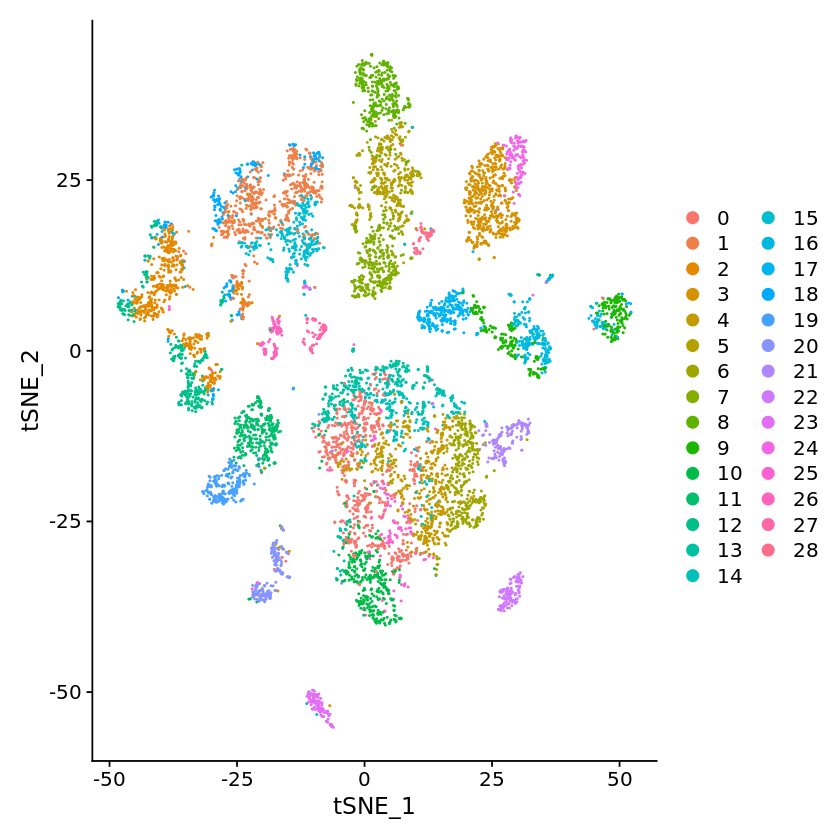

In [87]:
DimPlot(HumanLiverSeurat_neighbors_clusters,reduction='tsne')

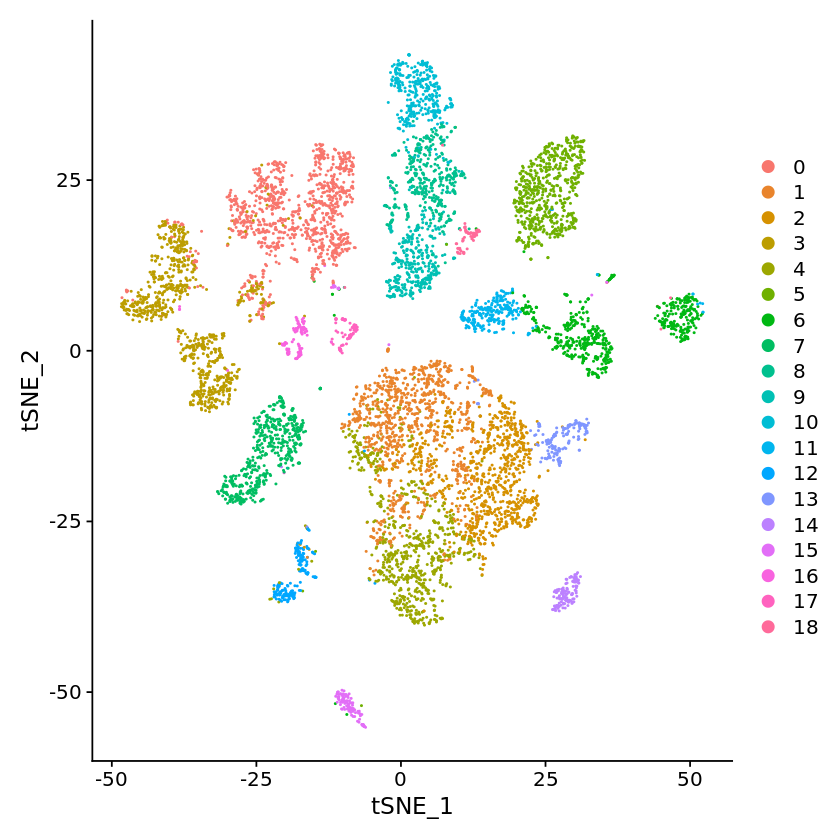

In [89]:
DimPlot(HumanLiverSeurat_neighbors_clusters,reduction='tsne')

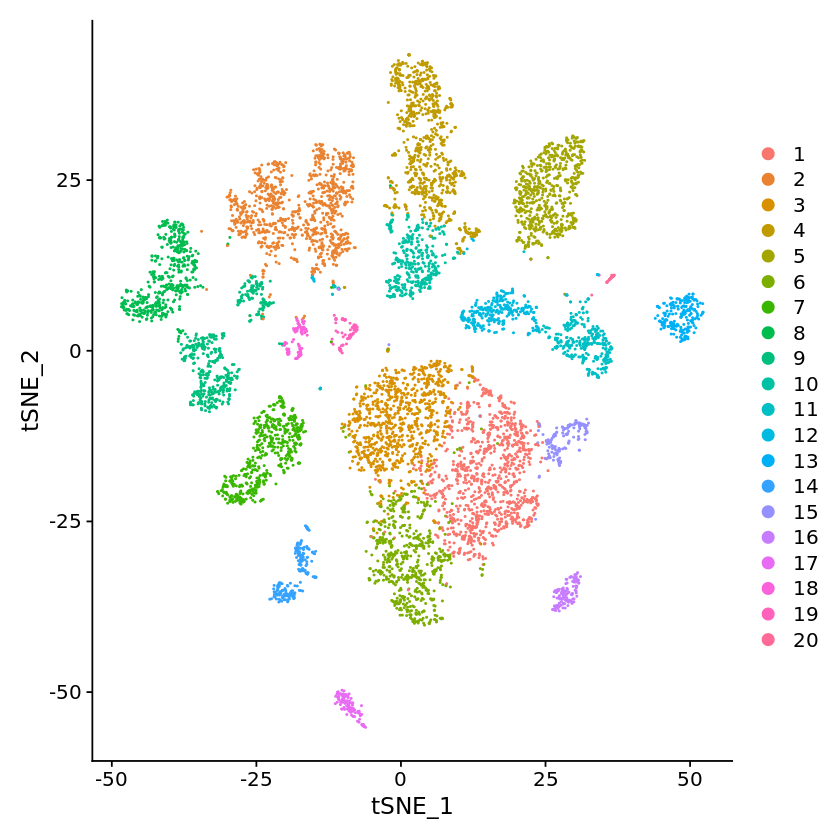

In [77]:
DimPlot(HumanLiverSeurat)

In [ ]:
HumanLiverSeurat_neighbors_clusters_umap=RunUMAP(HumanLiverSeurat_neighbors_clusters,dims = 1:10)

In [65]:
help(FindClusters)

FindClusters              package:Seurat               R Documentation

_C_l_u_s_t_e_r _D_e_t_e_r_m_i_n_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     Identify clusters of cells by a shared nearest neighbor (SNN)
     modularity optimization based clustering algorithm. First
     calculate k-nearest neighbors and construct the SNN graph. Then
     optimize the modularity function to determine clusters. For a full
     description of the algorithms, see Waltman and van Eck (2013) _The
     European Physical Journal B_. Thanks to Nigel Delaney
     (evolvedmicrobe@github) for the rewrite of the Java modularity
     optimizer code in Rcpp!

_U_s_a_g_e:

     FindClusters(object, ...)
     
     ## Default S3 method:
     FindClusters(
       object,
       modularity.fxn = 1,
       initial.membership = NULL,
       weights = NULL,
       node.sizes = NULL,
       resolution = 0.8,
       method = "matrix",
       algorithm = 1,
       n.start = 10,
       n.iter = 10,
       random.seed = 0,
       group.singletons = TRUE,
       temp.file.location = NULL,
       edge.file.name = NULL,
       verbose = TRUE,
       ...
     )
     
     ## S3 method for class 'Seurat'
     FindClusters(
       object,
       graph.name = NULL,
       modularity.fxn = 1,
       initial.membership = NULL,
       weights = NULL,
       node.sizes = NULL,
       resolution = 0.8,
       method = "matrix",
       algorithm = 1,
       n.start = 10,
       n.iter = 10,
       random.seed = 0,
       group.singletons = TRUE,
       temp.file.location = NULL,
       edge.file.name = NULL,
       verbose = TRUE,
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

  object: An object

     ...: Arguments passed to other methods

modularity.fxn: Modularity function (1 = standard; 2 = alternative).

initial.membership, weights, node.sizes: Parameters to pass to the
          Python leidenalg function.

resolution: Value of the resolution parameter, use a value above
          (below) 1.0 if you want to obtain a larger (smaller) number
          of communities.

  method: Method for running leiden (defaults to matrix which is fast
          for small datasets). Enable method = "igraph" to avoid
          casting large data to a dense matrix.

algorithm: Algorithm for modularity optimization (1 = original Louvain
          algorithm; 2 = Louvain algorithm with multilevel refinement;
          3 = SLM algorithm; 4 = Leiden algorithm). Leiden requires the
          leidenalg python.

 n.start: Number of random starts.

  n.iter: Maximal number of iterations per random start.

random.seed: Seed of the random number generator.

group.singletons: Group singletons into nearest cluster. If FALSE,
          assign all singletons to a "singleton" group

temp.file.location: Directory where intermediate files will be written.
          Specify the ABSOLUTE path.

edge.file.name: Edge file to use as input for modularity optimizer jar.

 verbose: Print output

graph.name: Name of graph to use for the clustering algorithm

_D_e_t_a_i_l_s:

     To run Leiden algorithm, you must first install the leidenalg
     python package (e.g. via pip install leidenalg), see Traag et al
     (2018).

_V_a_l_u_e:

     Returns a Seurat object where the idents have been updated with
     new cluster info; latest clustering results will be stored in
     object metadata under 'seurat_clusters'. Note that
     'seurat_clusters' will be overwritten everytime FindClusters is
     run

In [64]:
help(FindNeighbors)

FindNeighbors              package:Seurat              R Documentation

_S_N_N _G_r_a_p_h _C_o_n_s_t_r_u_c_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     Constructs a Shared Nearest Neighbor (SNN) Graph for a given
     dataset. We first determine the k-nearest neighbors of each cell.
     We use this knn graph to construct the SNN graph by calculating
     the neighborhood overlap (Jaccard index) between every cell and
     its k.param nearest neighbors.

_U_s_a_g_e:

     FindNeighbors(object, ...)
     
     ## Default S3 method:
     FindNeighbors(
       object,
       distance.matrix = FALSE,
       k.param = 20,
       compute.SNN = TRUE,
       prune.SNN = 1/15,
       nn.method = "rann",
       annoy.metric = "euclidean",
       nn.eps = 0,
       verbose = TRUE,
       force.recalc = FALSE,
       ...
     )
     
     ## S3 method for class 'Assay'
     FindNeighbors(
       object,
       features = NULL,
       k.param = 20,
       compute.SNN = TRUE,
       prune.SNN = 1/15,
       nn.method = "rann",
       annoy.metric = "euclidean",
       nn.eps = 0,
       verbose = TRUE,
       force.recalc = FALSE,
       ...
     )
     
     ## S3 method for class 'dist'
     FindNeighbors(
       object,
       k.param = 20,
       compute.SNN = TRUE,
       prune.SNN = 1/15,
       nn.method = "rann",
       annoy.metric = "euclidean",
       nn.eps = 0,
       verbose = TRUE,
       force.recalc = FALSE,
       ...
     )
     
     ## S3 method for class 'Seurat'
     FindNeighbors(
       object,
       reduction = "pca",
       dims = 1:10,
       assay = NULL,
       features = NULL,
       k.param = 20,
       compute.SNN = TRUE,
       prune.SNN = 1/15,
       nn.method = "rann",
       annoy.metric = "euclidean",
       nn.eps = 0,
       verbose = TRUE,
       force.recalc = FALSE,
       do.plot = FALSE,
       graph.name = NULL,
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

  object: An object

     ...: Arguments passed to other methods

distance.matrix: Boolean value of whether the provided matrix is a
          distance matrix; note, for objects of class ‘dist’, this
          parameter will be set automatically

 k.param: Defines k for the k-nearest neighbor algorithm

compute.SNN: also compute the shared nearest neighbor graph

prune.SNN: Sets the cutoff for acceptable Jaccard index when computing
          the neighborhood overlap for the SNN construction. Any edges
          with values less than or equal to this will be set to 0 and
          removed from the SNN graph. Essentially sets the strigency of
          pruning (0 - no pruning, 1 - prune everything).

nn.method: Method for nearest neighbor finding. Options include: rann,
          annoy

annoy.metric: Distance metric for annoy. Options include: euclidean,
          cosine, manhattan, and hamming

  nn.eps: Error bound when performing nearest neighbor seach using
          RANN; default of 0.0 implies exact nearest neighbor search

 verbose: Whether or not to print output to the console

force.recalc: Force recalculation of SNN.

features: Features to use as input for building the SNN

reduction: Reduction to use as input for building the SNN

    dims: Dimensions of reduction to use as input

   assay: Assay to use in construction of SNN

 do.plot: Plot SNN graph on tSNE coordinates

graph.name: Optional naming parameter for stored SNN graph. Default is
          assay.name_snn.

_V_a_l_u_e:

     Returns the object with object@snn filled

_E_x_a_m_p_l_e_s:

     pbmc_small
     # Compute an SNN on the gene expression level
     pbmc_small <- FindNeighbors(pbmc_small, features = VariableFeatures(object = pbmc_small))
     
     # More commonly, we build the SNN on a dimensionally reduced form of the data
     # such as the first 10 principle components.
     
     pbmc_small <- FindNeighbors(pbmc_small, reduction = "pca", dims = 1:10)

In [24]:
#class(de)
de["HBB",]

p_val avg_logFC pct.1 pct.2 p_val_adj
HBD 0     13.26719  0.935 0.025 0

p_val        avg_logFC pct.1 pct.2 p_val_adj   
HBB 5.501289e-91 12.67304  1     0.304 1.100643e-86

In [25]:
#class(de)
de["SLC25A37",]

p_val        avg_logFC pct.1 pct.2 p_val_adj    
SLC25A37 3.01814e-148 10.15912  0.935 0.126 6.038392e-144

In [42]:
de_8=FindMarkers(HumanLiverSeurat, ident.1 = 8)

In [52]:
de_9_18=FindMarkers(HumanLiverSeurat, ident.1 = c(9,18))

In [57]:
de_9_18_2=FindMarkers(HumanLiverSeurat, ident.1 = c(9,18),ident.2=2)

In [58]:
de_17_19=FindMarkers(HumanLiverSeurat, ident.1 = 17, ident.2=19)

In [59]:
de_17_19

p_val        avg_logFC   pct.1 pct.2 p_val_adj   
ALAS2     4.673615e-39  -9.5959342 0.025 0.946 9.350502e-35
HBA1      5.135143e-39 -16.5757488 0.210 1.000 1.027388e-34
AHSP      1.169839e-38 -11.1129824 0.017 0.935 2.340496e-34
HBA2      1.383664e-38 -16.4395486 0.244 1.000 2.768297e-34
HBD       2.119875e-38 -13.6774959 0.025 0.935 4.241235e-34
HBB       4.292754e-37 -17.1147765 0.403 1.000 8.588514e-33
CA1       9.522856e-37 -10.1003848 0.017 0.903 1.905238e-32
SNCA      4.056515e-36  -8.6703493 0.000 0.882 8.115870e-32
ANXA4     1.412670e-35   0.4849965 1.000 0.022 2.826329e-31
HBM       1.338569e-34 -10.9226139 0.008 0.860 2.678076e-30
DEFB1     1.869766e-34   3.1946129 0.924 0.000 3.740841e-30
FXYD2     3.250303e-34   2.1624250 0.941 0.011 6.502881e-30
TM4SF4    4.965375e-34  -1.9295024 0.983 0.054 9.934226e-30
SLC25A37  9.449611e-34 -10.5435752 0.227 0.935 1.890584e-29
MT-ND4    5.578721e-33  -7.3019574 1.000 1.000 1.116135e-28
MT-CO1    6.052471e-33  -7.3046659 1.000 1.000 1.210918e-28
MT-CYB    6.566153e-33  -7.2331691 1.000 1.000 1.313690e-28
KRT8      1.161174e-32   1.5461376 0.924 0.022 2.323161e-28
MT-CO3    1.327685e-32  -7.1296158 1.000 1.000 2.656299e-28
MT-CO2    1.439734e-32  -7.1650960 1.000 1.000 2.880475e-28
KRT18     2.717144e-32   0.4737376 0.933 0.043 5.436190e-28
FTL       4.222378e-32  -6.8616223 0.992 1.000 8.447711e-28
CD24      4.813514e-32   1.6500375 0.924 0.022 9.630397e-28
FTH1      8.021135e-32  -6.0830545 1.000 0.989 1.604788e-27
UBB       1.150308e-31  -8.8668724 0.916 0.978 2.301422e-27
MT-ND3    5.547674e-31  -7.4138392 1.000 1.000 1.109923e-26
MT-ATP6   7.806397e-31  -7.0982066 1.000 1.000 1.561826e-26
LGALS4    8.663709e-31   1.5624452 0.857 0.000 1.733348e-26
SLC25A39  9.674892e-31  -8.3703222 0.261 0.903 1.935656e-26
SLC4A1    7.938948e-30  -9.2438404 0.000 0.763 1.588345e-25
⋮         ⋮            ⋮           ⋮     ⋮     ⋮           
ISCU      0.9632045    -6.3131106  0.504 0.344 1           
TSTA3     0.9635529    -2.5975131  0.311 0.237 1           
TAB3      0.9656501    -2.2670681  0.118 0.108 1           
FOPNL     0.9659975    -2.6453285  0.109 0.097 1           
RPL3      0.9684270    -4.2143627  0.992 0.624 1           
BRD3      0.9720332    -2.8859802  0.134 0.118 1           
HP1BP3    0.9721491    -3.7357057  0.378 0.280 1           
KPNA1     0.9721900    -2.1585364  0.118 0.108 1           
MTRNR2L12 0.9745990    -4.9996220  0.546 0.366 1           
NBR1      0.9749448    -3.3074103  0.176 0.151 1           
EXOC7     0.9751396    -1.2473247  0.134 0.118 1           
AKIRIN1   0.9768803    -2.3547479  0.160 0.140 1           
EPRS      0.9782463    -1.2193247  0.134 0.118 1           
MBNL3     0.9784645    -2.9090402  0.193 0.161 1           
GTF2A2    0.9789778    -2.7008101  0.286 0.226 1           
MARCH3    0.9820032    -2.5824705  0.118 0.108 1           
ACIN1     0.9855489    -3.7813475  0.160 0.140 1           
RRP7A     0.9884389    -3.8829023  0.160 0.140 1           
USP48     0.9885469    -0.8994053  0.118 0.108 1           
PICALM    0.9892313    -1.3659867  0.193 0.161 1           
POLR2I    0.9908862    -2.8945848  0.471 0.323 1           
PWP1      0.9950914    -4.0736683  0.118 0.108 1           
HMGN5     0.9968919    -2.2550423  0.134 0.118 1           
PINK1     0.9971096    -2.6558108  0.160 0.140 1           
IFRD2     0.9972156    -1.9644526  0.176 0.151 1           
VTI1B     0.9976639    -5.3111481  0.286 0.226 1           
DDX3X     0.9977474    -3.9614710  0.319 0.247 1           
HNRNPM    0.9978757    -3.0178433  0.387 0.290 1           
MTRNR2L8  0.9979547    -7.1539756  0.445 0.323 1           
ETFA      0.9988079    -1.3275385  0.269 0.215 1

In [55]:
de_9_18_2

p_val         avg_logFC  pct.1 pct.2 p_val_adj    
GNLY    1.129964e-189  3.5095954 0.849 0.134 2.260719e-185
FGFBP2  4.378639e-176  2.7734093 0.701 0.028 8.760344e-172
GZMB    4.056693e-167  2.9143859 0.749 0.084 8.116226e-163
FCER1G  2.009440e-130  2.5738642 0.619 0.060 4.020286e-126
NKG7    4.951719e-118  1.4112325 0.977 0.732 9.906904e-114
TYROBP  9.740203e-118  2.1347024 0.729 0.179 1.948722e-113
KLRF1   6.791162e-105  2.0999978 0.654 0.132 1.358708e-100
FCGR3A   1.627730e-95  1.8984147 0.552 0.077  3.256599e-91
CD3D     2.488979e-78 -1.1092315 0.274 0.846  4.979701e-74
PRF1     3.074704e-73  1.1669505 0.787 0.391  6.151561e-69
CLIC3    3.912993e-73  1.5499334 0.420 0.051  7.828724e-69
SPON2    5.035473e-73  2.0757634 0.559 0.143  1.007447e-68
PLAC8    2.593419e-72  1.5807303 0.738 0.308  5.188654e-68
TRAC     3.231567e-66 -1.6558213 0.281 0.773  6.465397e-62
ADGRG1   3.129219e-63  1.3226333 0.337 0.026  6.260628e-59
GZMK     7.657239e-63 -2.7287775 0.120 0.525  1.531984e-58
CD3E     8.127572e-63 -1.1411091 0.265 0.727  1.626083e-58
IL7R     8.758503e-60 -1.7825149 0.086 0.481  1.752314e-55
KLRD1    1.112940e-59  0.8091496 0.817 0.398  2.226659e-55
EFHD2    2.079285e-55  1.2333734 0.492 0.132  4.160025e-51
RPL13    2.347724e-53 -1.1666466 1.000 1.000  4.697091e-49
LTB      8.585104e-52 -1.5774256 0.118 0.488  1.717622e-47
CD247    1.427737e-51  0.4149131 0.666 0.315  2.856473e-47
CX3CR1   9.305606e-51  1.0679078 0.246 0.010  1.861773e-46
RPS18    5.526116e-50 -1.3324743 1.000 1.000  1.105610e-45
RPS12    2.133810e-49 -1.0795686 0.991 1.000  4.269114e-45
IGFBP7   1.357178e-46  1.2221390 0.337 0.061  2.715306e-42
RPL39    3.267349e-46 -1.1788102 0.993 1.000  6.536985e-42
RPS25    4.482473e-45 -1.0289600 0.981 0.998  8.968084e-41
RPS29    6.997573e-45 -1.1557438 1.000 1.000  1.400004e-40
⋮       ⋮             ⋮          ⋮     ⋮     ⋮            
DDT     0.9545006     -0.2856421 0.387 0.371 1            
XCL1    0.9576926     -0.6199979 0.114 0.111 1            
ARL6IP5 0.9632239      0.3640614 0.455 0.467 1            
KXD1    0.9644874      0.4575122 0.139 0.135 1            
MRPL36  0.9650411     -0.5807281 0.105 0.106 1            
PGK1    0.9676223     -0.4758509 0.306 0.303 1            
GIT2    0.9688286     -0.7363673 0.114 0.111 1            
NDUFB8  0.9689154     -0.6502341 0.376 0.367 1            
RPS26   0.9699999     -0.8501718 0.938 0.890 1            
FABP1   0.9718222     -0.7369459 0.257 0.270 1            
RBBP6   0.9728333     -0.4475208 0.155 0.150 1            
PRPF6   0.9739677     -0.5626068 0.120 0.117 1            
PTGER4  0.9746249      0.2593512 0.169 0.168 1            
BCL2L1  0.9748518      0.4512711 0.105 0.107 1            
LSM14A  0.9755033     -0.4551836 0.227 0.216 1            
SRI     0.9770380     -0.6890347 0.234 0.232 1            
MOAP1   0.9777185     -1.1550892 0.102 0.102 1            
VIMP    0.9783361     -1.1252383 0.165 0.164 1            
LSM7    0.9790497     -0.7221645 0.304 0.291 1            
NMT1    0.9832095     -0.5541740 0.199 0.196 1            
VAPA    0.9916162     -0.3649411 0.306 0.304 1            
UBL5    0.9916714     -0.3645036 0.627 0.636 1            
TRMT112 0.9917556     -0.4009967 0.438 0.429 1            
RBM26   0.9938234     -0.3785259 0.118 0.116 1            
YPEL5   0.9939137     -0.5062944 0.248 0.241 1            
APEX1   0.9945231     -0.3875767 0.200 0.199 1            
PLIN2   0.9950261     -0.4123786 0.130 0.131 1            
ABT1    0.9955777     -0.9407870 0.132 0.128 1            
GPSM3   0.9988964      0.2545578 0.550 0.544 1            
RNF115  0.9996899      0.4956933 0.148 0.147 1

In [53]:
de_9_18

p_val         avg_logFC  pct.1 pct.2 p_val_adj    
GNLY      0.000000e+00 4.4045019  0.849 0.054  0.000000e+00
GZMB      0.000000e+00 3.1007331  0.749 0.030  0.000000e+00
FGFBP2    0.000000e+00 2.9016089  0.701 0.009  0.000000e+00
NKG7      0.000000e+00 2.6640334  0.977 0.214  0.000000e+00
PRF1      0.000000e+00 2.4564558  0.787 0.102  0.000000e+00
KLRF1     0.000000e+00 2.1766573  0.654 0.083  0.000000e+00
HOPX      0.000000e+00 2.1221810  0.643 0.067  0.000000e+00
CST7      0.000000e+00 2.0478350  0.794 0.139  0.000000e+00
KLRD1     0.000000e+00 2.0338746  0.817 0.127  0.000000e+00
CTSW      0.000000e+00 1.9411822  0.656 0.097  0.000000e+00
GZMA      0.000000e+00 1.6869482  0.826 0.161  0.000000e+00
CD247     0.000000e+00 1.6655201  0.666 0.094  0.000000e+00
GZMH      0.000000e+00 0.4185559  0.613 0.062  0.000000e+00
CD7      5.568852e-297 1.5653256  0.749 0.140 1.114160e-292
CCL5     5.038059e-294 1.3702590  0.828 0.185 1.007964e-289
ADGRG1   1.505773e-281 1.4068325  0.337 0.023 3.012600e-277
CLIC3    1.719113e-278 1.5692834  0.420 0.041 3.439429e-274
CX3CR1   2.605767e-278 1.0851704  0.246 0.008 5.213359e-274
HCST     6.492012e-234 1.2198656  0.900 0.285 1.298857e-229
SPON2    8.597174e-233 1.8654483  0.559 0.103 1.720037e-228
LAIR2    1.090477e-231 0.9188110  0.158 0.002 2.181718e-227
CCL4     4.518852e-231 1.2702016  0.786 0.210 9.040868e-227
S1PR5    1.379599e-205 0.9535507  0.278 0.022 2.760163e-201
PLAC8    1.852403e-192 0.5416363  0.738 0.225 3.706103e-188
BIN2     2.059559e-191 0.5660226  0.525 0.105 4.120560e-187
CORO1A   2.253706e-189 1.3112822  0.831 0.288 4.508989e-185
ARL4C    1.462384e-184 0.8699980  0.578 0.136 2.925791e-180
FCGR3A   2.682616e-184 1.1313339  0.552 0.114 5.367111e-180
ITGB2    3.478699e-184 0.9468813  0.712 0.209 6.959834e-180
S100A4   1.365620e-179 0.4852177  0.868 0.298 2.732195e-175
⋮        ⋮             ⋮          ⋮     ⋮     ⋮            
SLC25A11 0.9216437     -0.3137302 0.139 0.143 1            
PARP1    0.9257744     -0.3259938 0.183 0.185 1            
MRPL42   0.9294707     -0.9281260 0.125 0.124 1            
PMF1     0.9340557     -0.4172447 0.144 0.144 1            
TUBB4B   0.9390511     -1.2511327 0.241 0.254 1            
BHLHE40  0.9520814     -0.4090473 0.125 0.129 1            
U2SURP   0.9535281     -0.8416091 0.176 0.181 1            
MRPL47   0.9548490     -0.3534614 0.149 0.149 1            
COX7A2L  0.9553222     -1.2687127 0.387 0.413 1            
TOMM22   0.9572397     -0.5351135 0.250 0.256 1            
CCAR1    0.9592487     -0.5437952 0.118 0.119 1            
CTBP1    0.9604340     -0.9906431 0.192 0.193 1            
FAAP20   0.9609844     -0.2544911 0.213 0.215 1            
ATP5L    0.9617276     -1.4401205 0.777 0.803 1            
NUBP2    0.9620580     -0.4063713 0.148 0.149 1            
GADD45B  0.9625478     -0.9417161 0.262 0.287 1            
WBSCR22  0.9633095     -0.3132229 0.134 0.135 1            
HLA-DQB1 0.9668355     -0.7698244 0.132 0.128 1            
EID1     0.9670779     -0.6223906 0.362 0.380 1            
HMGN3    0.9683619     -0.6798549 0.388 0.417 1            
WIPI2    0.9742895     -1.7586417 0.155 0.158 1            
ZNF90    0.9765520     -0.4006884 0.199 0.202 1            
MZT2B    0.9812197     -1.3332901 0.464 0.512 1            
EEF2     0.9835506     -1.3481728 0.726 0.776 1            
STK24    0.9851616     -0.8183845 0.105 0.105 1            
MAP2K3   0.9874463     -2.1570639 0.148 0.148 1            
ARL5A    0.9882259     -0.6807393 0.216 0.229 1            
BRWD1    0.9945274     -0.2873445 0.112 0.113 1            
SMARCA2  0.9946662     -0.4585367 0.139 0.142 1            
PRPF19   0.9954703     -0.4631075 0.102 0.102 1

In [43]:
de_2=FindMarkers(HumanLiverSeurat, ident.1 = 2)

In [44]:
de_2

p_val         avg_logFC  pct.1 pct.2 p_val_adj    
CD2         0.000000e+00 2.7796672  0.675 0.069  0.000000e+00
TRAC        0.000000e+00 2.6324055  0.773 0.045  0.000000e+00
CD3D        0.000000e+00 2.6202792  0.846 0.039  0.000000e+00
GZMK        0.000000e+00 2.5930166  0.525 0.068  0.000000e+00
CCL5        0.000000e+00 2.4823468  0.866 0.147  0.000000e+00
TRBC2       0.000000e+00 2.1639178  0.637 0.088  0.000000e+00
GZMA        0.000000e+00 2.1409403  0.738 0.138  0.000000e+00
CD3E        0.000000e+00 2.1271335  0.727 0.052  0.000000e+00
CD69        0.000000e+00 1.9998582  0.626 0.103  0.000000e+00
IL7R        0.000000e+00 1.9440451  0.481 0.021  0.000000e+00
LTB         0.000000e+00 1.8521250  0.488 0.051  0.000000e+00
IL32        0.000000e+00 1.8163001  0.853 0.195  0.000000e+00
CD52        0.000000e+00 1.8140822  0.675 0.136  0.000000e+00
ACAP1       0.000000e+00 1.7591702  0.600 0.120  0.000000e+00
HCST        0.000000e+00 1.6893300  0.861 0.258  0.000000e+00
TRGC2       0.000000e+00 1.6310284  0.367 0.030  0.000000e+00
AC092580.4  0.000000e+00 1.5759881  0.434 0.044  0.000000e+00
CORO1A      0.000000e+00 1.4690886  0.835 0.259  0.000000e+00
CD3G        0.000000e+00 1.4114489  0.528 0.023  0.000000e+00
CST7        0.000000e+00 1.3220382  0.619 0.127  0.000000e+00
LCK         0.000000e+00 1.2917199  0.533 0.065  0.000000e+00
CD8A        0.000000e+00 1.2806655  0.350 0.020  0.000000e+00
KLRG1       0.000000e+00 1.2421850  0.409 0.043  0.000000e+00
CXCR4       0.000000e+00 1.0499886  0.828 0.229  0.000000e+00
S100A4      0.000000e+00 0.7742093  0.869 0.268  0.000000e+00
DUSP2      3.445425e-303 1.9103645  0.542 0.098 6.893262e-299
CD8B       1.149484e-299 1.5246729  0.233 0.007 2.299774e-295
BTG1       6.716250e-290 0.9653783  0.958 0.582 1.343720e-285
CD48       5.450229e-276 1.5102756  0.649 0.172 1.090427e-271
RPS3       1.287032e-268 0.8107850  1.000 0.901 2.574965e-264
⋮          ⋮             ⋮          ⋮     ⋮     ⋮            
RBM6       0.8657598     -0.9524467 0.127 0.129 1            
AKR1B1     0.8669982     -0.2949911 0.125 0.128 1            
ANXA2      0.8685828     -0.5647667 0.301 0.306 1            
SHARPIN    0.8704643     -1.2132504 0.108 0.115 1            
SHISA5     0.8718597     -0.3399653 0.187 0.196 1            
NOP58      0.8731944     -0.5345924 0.126 0.129 1            
RRP7A      0.8837527     -0.3227670 0.108 0.114 1            
LSM10      0.8899665     -0.4976833 0.162 0.174 1            
TNFRSF1B   0.8900321     -1.1803129 0.120 0.123 1            
NMRK1      0.8914515     -1.2402826 0.114 0.120 1            
KRTCAP2    0.8933864     -0.7445759 0.352 0.389 1            
ATP6V0E1   0.8956845     -0.4242493 0.502 0.542 1            
TCIRG1     0.9059527     -0.2781844 0.110 0.116 1            
KLHDC3     0.9065480     -0.8064657 0.104 0.107 1            
AP2M1      0.9067050     -1.9176896 0.255 0.273 1            
UBE2E1     0.9166145     -0.5707890 0.100 0.103 1            
TM2D3      0.9208241     -0.3677294 0.128 0.135 1            
ITM2B      0.9276886     -1.4266231 0.707 0.716 1            
TMEM160    0.9456570     -0.9772086 0.237 0.257 1            
CDK11B     0.9522937     -0.4180265 0.101 0.104 1            
COX4I1     0.9572507     -1.0344478 0.838 0.844 1            
C19orf53   0.9576163     -0.6738103 0.465 0.500 1            
GTF2F1     0.9582790     -0.3596419 0.113 0.118 1            
SLTM       0.9591640     -0.3606300 0.222 0.240 1            
IGHA1      0.9680690     -6.8768079 0.159 0.157 1            
SF3B1      0.9756390     -0.2735029 0.221 0.236 1            
DDX46      0.9791272     -0.3646229 0.257 0.278 1            
MXD4       0.9941229     -0.6307336 0.133 0.139 1            
PA2G4      0.9977915     -1.2604149 0.342 0.369 1            
NCOR1      0.9995383     -0.2650811 0.250 0.268 1

In [51]:
de_8

p_val         avg_logFC  pct.1 pct.2 p_val_adj    
CD7        0.000000e+00 2.2107350  0.959 0.133  0.000000e+00
CMC1       0.000000e+00 2.1519740  0.963 0.237  0.000000e+00
XCL2       0.000000e+00 1.9494252  0.793 0.051  0.000000e+00
KLRB1      0.000000e+00 1.8897026  0.980 0.138  0.000000e+00
XCL1       0.000000e+00 1.8210128  0.607 0.026  0.000000e+00
KLRC1      0.000000e+00 1.7483504  0.727 0.036  0.000000e+00
KLRF1      0.000000e+00 1.6504246  0.898 0.073  0.000000e+00
IL2RB      0.000000e+00 1.6114311  0.715 0.051  0.000000e+00
CD160      0.000000e+00 1.5484424  0.699 0.044  0.000000e+00
KLRD1      0.000000e+00 1.3228527  0.945 0.126  0.000000e+00
NKG7       0.000000e+00 1.2704704  0.975 0.222  0.000000e+00
TXK        0.000000e+00 1.2592854  0.633 0.045  0.000000e+00
TRDC       0.000000e+00 1.1402946  0.527 0.036  0.000000e+00
TMIGD2     0.000000e+00 1.0925546  0.543 0.039  0.000000e+00
GZMK       0.000000e+00 1.0334542  0.752 0.082  0.000000e+00
CD247      0.000000e+00 0.8968520  0.703 0.097  0.000000e+00
CCL3      8.063638e-287 1.3837070  0.803 0.162 1.613292e-282
CLIC3     1.057548e-284 1.0387571  0.461 0.042 2.115836e-280
CCL4      9.911582e-271 0.9256899  0.898 0.209 1.983010e-266
MATK      1.946935e-270 0.9767204  0.570 0.074 3.895232e-266
GZMA      3.294832e-263 0.4196453  0.834 0.167 6.591970e-259
ALOX5AP   2.404341e-245 1.1746262  0.711 0.136 4.810366e-241
EOMES     4.209674e-242 0.2677382  0.406 0.039 8.422294e-238
FCER1G    4.685182e-236 0.3497864  0.910 0.223 9.373645e-232
AREG      6.666143e-231 0.7724423  0.537 0.078 1.333695e-226
TRBC1     1.650457e-230 0.4996142  0.596 0.093 3.302070e-226
ADGRG3    4.124461e-228 0.4869074  0.174 0.003 8.251810e-224
PRF1      3.732708e-220 0.2802444  0.656 0.118 7.468028e-216
HCST      2.524057e-217 0.5964778  0.926 0.290 5.049882e-213
ACAP1     1.859792e-214 0.6428129  0.691 0.143 3.720885e-210
⋮         ⋮             ⋮          ⋮     ⋮     ⋮            
USP15     0.9212208     -0.7511216 0.145 0.150 1            
ATP6V1F   0.9221989     -2.1967243 0.309 0.324 1            
CLTB      0.9234671     -0.5262281 0.195 0.202 1            
RPS14     0.9278296     -1.4947960 0.996 0.970 1            
SAR1A     0.9366002     -0.4984679 0.221 0.231 1            
CNPY3     0.9376306     -0.6974857 0.186 0.192 1            
SLBP      0.9393371     -1.4571435 0.100 0.103 1            
USE1      0.9472369     -2.1452452 0.115 0.118 1            
TMEM9B    0.9515629     -0.9568147 0.131 0.138 1            
SERPINB1  0.9550311     -0.9262729 0.193 0.191 1            
MYEOV2    0.9553387     -1.3243897 0.496 0.509 1            
BAG1      0.9568516     -2.2358146 0.189 0.198 1            
UBE2E3    0.9580807     -0.5954999 0.162 0.169 1            
KLF2      0.9592526     -1.1494492 0.215 0.225 1            
ANAPC5    0.9596739     -0.3962253 0.170 0.177 1            
C11orf73  0.9621409     -2.2503476 0.125 0.132 1            
SEC22B    0.9628294     -1.1966346 0.158 0.165 1            
CNOT7     0.9630607     -0.7027863 0.172 0.180 1            
CDK11B    0.9652910     -0.6026319 0.102 0.104 1            
PPIA      0.9675120     -1.3665321 0.783 0.772 1            
RB1CC1    0.9701401     -1.2939687 0.115 0.118 1            
USF2      0.9712911     -0.5425203 0.131 0.137 1            
CDIPT     0.9734142     -1.0584544 0.115 0.120 1            
SPOP      0.9736026     -0.4346954 0.139 0.146 1            
ARID1A    0.9736522     -1.0612218 0.160 0.166 1            
WBP11     0.9776716     -0.2539788 0.139 0.143 1            
PYURF     0.9860915     -0.6091595 0.273 0.287 1            
MMP24-AS1 0.9904580     -0.3540876 0.166 0.172 1            
RPS6KB2   0.9956493     -0.3785170 0.137 0.141 1            
IFT20     0.9993387     -0.7215532 0.127 0.132 1

In [50]:
de_2[c('CD2','CD3D','TRAC','IL32','CD3E','PTPRC'),]

p_val         avg_logFC pct.1 pct.2 p_val_adj    
CD2    0.000000e+00 2.7796672 0.675 0.069  0.000000e+00
CD3D   0.000000e+00 2.6202792 0.846 0.039  0.000000e+00
TRAC   0.000000e+00 2.6324055 0.773 0.045  0.000000e+00
IL32   0.000000e+00 1.8163001 0.853 0.195  0.000000e+00
CD3E   0.000000e+00 2.1271335 0.727 0.052  0.000000e+00
PTPRC 2.050812e-223 0.7825287 0.660 0.208 4.103059e-219

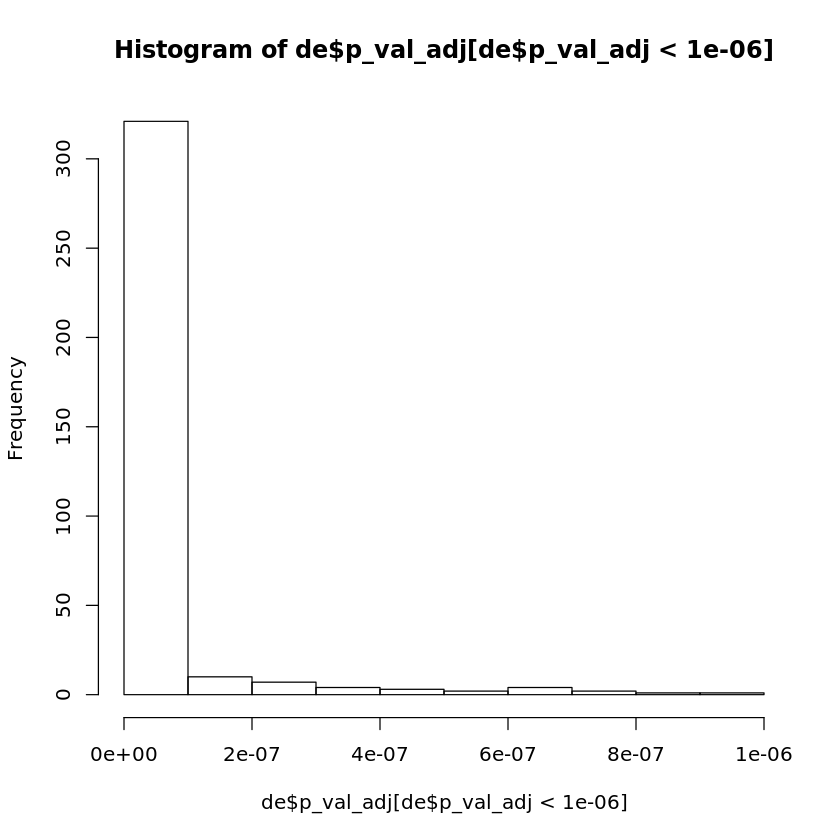

In [37]:
hist(de$p_val_adj[de$p_val_adj<0.000001])

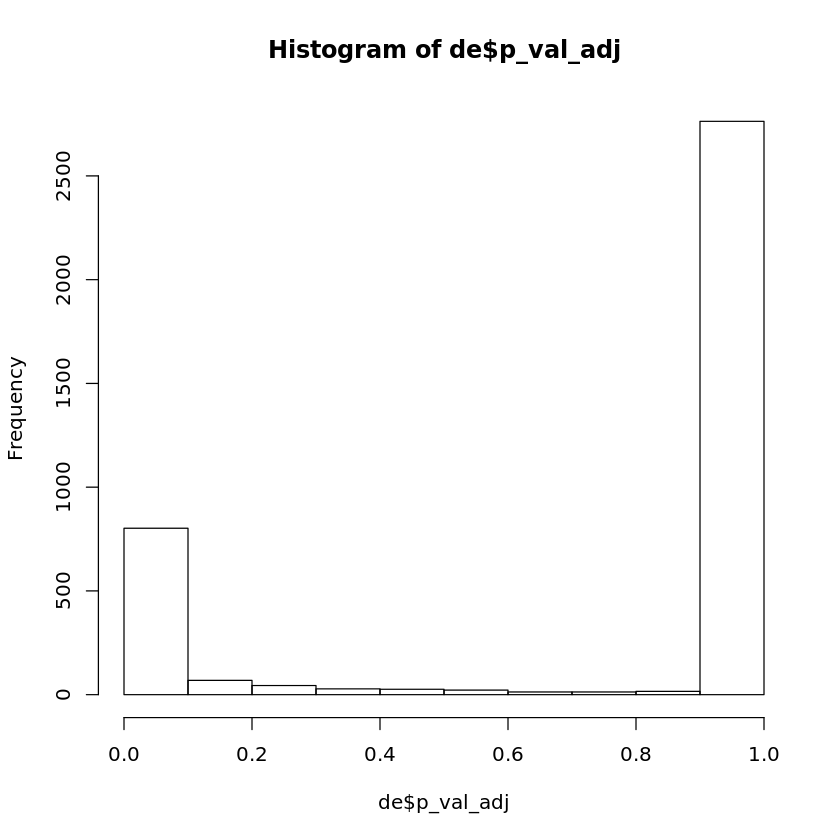

In [27]:
hist(de$p_val_adj)

In [29]:
help(hist)

hist                 package:graphics                  R Documentation

_H_i_s_t_o_g_r_a_m_s

_D_e_s_c_r_i_p_t_i_o_n:

     The generic function ‘hist’ computes a histogram of the given
     data values.  If ‘plot = TRUE’, the resulting object of class
     ‘"histogram"’ is plotted by ‘plot.histogram’, before it is
     returned.

_U_s_a_g_e:

     hist(x, ...)
     
     ## Default S3 method:
     hist(x, breaks = "Sturges",
          freq = NULL, probability = !freq,
          include.lowest = TRUE, right = TRUE,
          density = NULL, angle = 45, col = NULL, border = NULL,
          main = paste("Histogram of" , xname),
          xlim = range(breaks), ylim = NULL,
          xlab = xname, ylab,
          axes = TRUE, plot = TRUE, labels = FALSE,
          nclass = NULL, warn.unused = TRUE, ...)
     
_A_r_g_u_m_e_n_t_s:

       x: a vector of values for which the histogram is desired.

  breaks: one of:

            • a vector giving the breakpoints between histogram cells,

            • a function to compute the vector of breakpoints,

            • a single number giving the number of cells for the
              histogram,

            • a character string naming an algorithm to compute the
              number of cells (see ‘Details’),

            • a function to compute the number of cells.

          In the last three cases the number is a suggestion only; as
          the breakpoints will be set to ‘pretty’ values, the number
          is limited to ‘1e6’ (with a warning if it was larger).  If
          ‘breaks’ is a function, the ‘x’ vector is supplied to it
          as the only argument (and the number of breaks is only
          limited by the amount of available memory).

    freq: logical; if ‘TRUE’, the histogram graphic is a
          representation of frequencies, the ‘counts’ component of
          the result; if ‘FALSE’, probability densities, component
          ‘density’, are plotted (so that the histogram has a total
          area of one).  Defaults to ‘TRUE’ _if and only if_
          ‘breaks’ are equidistant (and ‘probability’ is not
          specified).

probability: an _alias_ for ‘!freq’, for S compatibility.

include.lowest: logical; if ‘TRUE’, an ‘x[i]’ equal to the
          ‘breaks’ value will be included in the first (or last, for
          ‘right = FALSE’) bar.  This will be ignored (with a
          warning) unless ‘breaks’ is a vector.

   right: logical; if ‘TRUE’, the histogram cells are right-closed
          (left open) intervals.

 density: the density of shading lines, in lines per inch.  The default
          value of ‘NULL’ means that no shading lines are drawn.
          Non-positive values of ‘density’ also inhibit the drawing
          of shading lines.

   angle: the slope of shading lines, given as an angle in degrees
          (counter-clockwise).

     col: a colour to be used to fill the bars.  The default of
          ‘NULL’ yields unfilled bars.

  border: the color of the border around the bars.  The default is to
          use the standard foreground color.

main, xlab, ylab: these arguments to ‘title’ have useful defaults
          here.

xlim, ylim: the range of x and y values with sensible defaults.  Note
          that ‘xlim’ is _not_ used to define the histogram (breaks),
          but only for plotting (when ‘plot = TRUE’).

    axes: logical.  If ‘TRUE’ (default), axes are draw if the plot is
          drawn.

    plot: logical.  If ‘TRUE’ (default), a histogram is plotted,
          otherwise a list of breaks and counts is returned.  In the
          latter case, a warning is used if (typically graphical)
          arguments are specified that only apply to the ‘plot =
          TRUE’ case.

  labels: logical or character string.  Additionally draw labels on top
          of bars, if not ‘FALSE’; see ‘plot.histogram’.

  nclass: numeric (integer).  For S(-PLUS) compatibility only,
          ‘nclass’ is equivalent to ‘breaks

In [13]:
FindMarkers(HumanLiverSeurat, ident.1 = "2", ident.2 = "8")

p_val         avg_logFC  pct.1 pct.2 p_val_adj    
FCER1G      9.035234e-231 -2.4583987 0.060 0.910 1.807679e-226
TYROBP      2.197741e-206 -2.3123263 0.179 0.965 4.397021e-202
KLRF1       1.334841e-181 -1.7791598 0.132 0.898 2.670616e-177
CD3D        1.369051e-156  2.8942142 0.846 0.035 2.739060e-152
KLRC1       2.762543e-143 -1.3852940 0.071 0.727 5.527020e-139
CD7         5.814915e-128 -1.4547214 0.506 0.959 1.163390e-123
S100A4      2.107127e-121  2.7028842 0.869 0.328 4.215729e-117
S100A6      6.625718e-118  2.4444378 0.803 0.184 1.325607e-113
IL2RB       3.359847e-109 -0.8744115 0.154 0.715 6.722046e-105
XCL2        5.172534e-108 -1.1716976 0.187 0.793 1.034869e-103
TRAC        1.345475e-106  2.6870824 0.773 0.182 2.691892e-102
CMC1        1.173358e-105 -0.9633290 0.468 0.963 2.347538e-101
CD52        3.655971e-105  2.7304846 0.675 0.045 7.314501e-101
TXK         3.803775e-105 -1.2536162 0.099 0.633 7.610213e-101
AREG         1.567915e-96 -1.8165878 0.061 0.537  3.136927e-92
GSTP1        8.095064e-88 -0.9005361 0.378 0.842  1.619579e-83
CD160        1.476945e-87 -0.8224143 0.179 0.699  2.954924e-83
CCL3         2.305647e-86 -0.6345215 0.260 0.803  4.612907e-82
XCL1         1.899635e-82 -0.9326883 0.111 0.607  3.800600e-78
CLIC3        1.331306e-79 -1.1472532 0.051 0.461  2.663544e-75
KLRD1        3.157597e-79 -0.3203901 0.398 0.945  6.317405e-75
CD3G         3.691750e-79  1.6442213 0.528 0.010  7.386084e-75
TRDC         1.178190e-76 -0.8662648 0.073 0.527  2.357204e-72
LAT2         1.653947e-68 -0.8496484 0.025 0.361  3.309051e-64
IL7R         3.833477e-68  2.0946019 0.481 0.018  7.669637e-64
TMIGD2       2.053206e-67 -1.0122781 0.121 0.543  4.107848e-63
IL32         3.216567e-63  1.5790220 0.853 0.436  6.435385e-59
CD3E         3.468503e-62  1.4697861 0.727 0.289  6.939434e-58
B2M          8.877549e-61  1.3524180 1.000 1.000  1.776131e-56
NKG7         2.974620e-60 -0.5213486 0.732 0.975  5.951321e-56
⋮           ⋮             ⋮          ⋮     ⋮     ⋮            
TMEM59      0.9509811      0.9484710 0.403 0.424 1            
CACYBP      0.9568222      0.3238990 0.171 0.170 1            
ATM         0.9582271      0.6215240 0.308 0.322 1            
ZMYM2       0.9594181      0.5796179 0.125 0.125 1            
C14orf166   0.9596145      0.4713680 0.322 0.344 1            
NLRP1       0.9652203      0.7655929 0.102 0.102 1            
NDUFB11     0.9689627      1.0526650 0.419 0.434 1            
TTR         0.9702963      1.2649297 0.310 0.326 1            
SEPP1       0.9717879      0.7437430 0.194 0.201 1            
ASCC2       0.9727551      0.9779401 0.136 0.137 1            
RAP1A       0.9738008      0.6296845 0.292 0.303 1            
HLA-F       0.9738857      0.6622782 0.411 0.447 1            
SRSF3       0.9741304      0.7965334 0.558 0.607 1            
AES         0.9742975      1.2057109 0.451 0.475 1            
HNRNPH1     0.9783017      0.5481370 0.362 0.379 1            
EIF3A       0.9808519      1.2586392 0.219 0.223 1            
ADD3        0.9810411      0.6015419 0.185 0.189 1            
HBA2        0.9821948     -3.1651409 0.239 0.244 1            
SUB1        0.9847291      0.5300722 0.604 0.645 1            
PRDX6       0.9857010      0.6297056 0.322 0.338 1            
PPP1R7      0.9872239      0.8420108 0.142 0.148 1            
RP11-51J9.5 0.9888927      0.2749321 0.293 0.299 1            
NEDD8       0.9893082      0.7186039 0.467 0.504 1            
C16orf13    0.9909335      1.4795274 0.173 0.176 1            
ANP32E      0.9915483      0.7731163 0.149 0.152 1            
YIPF3       0.9934254      0.9606676 0.101 0.102 1            
MYLIP       0.9958176      0.5158305 0.238 0.240 1            
LUC7L2      0.9964509      0.5847976 0.145 0.145 1            
ARPC3       0.9976636      0.8438868 0.618 0.668 1            
FMNL1       0.9997869      0.5358086 0.234 0.244 1

In [14]:
FindMarkers(HumanLiverSeurat, ident.1 = "1")

p_val     avg_logFC  pct.1 pct.2 p_val_adj
HSD11B1   0          0.5180472 0.896 0.207 0        
APOM      0          0.4789606 0.913 0.204 0        
PON3      0          0.3536757 0.858 0.177 0        
TTC36     0          0.3300089 0.827 0.193 0        
F10       0          0.2828379 0.583 0.104 0        
BCHE      0          0.2651199 0.749 0.156 0        
HGD       0         -0.2734664 0.846 0.240 0        
VKORC1    0         -0.3604967 0.909 0.359 0        
CYP2D6    0         -0.3674629 0.806 0.196 0        
HSD17B6   0         -0.3826071 0.978 0.365 0        
SULT2A1   0         -0.3962821 0.963 0.330 0        
KRT18     0         -0.4434444 0.862 0.229 0        
RARRES2   0         -0.4547302 0.992 0.399 0        
APOC2     0         -0.5003661 0.933 0.279 0        
LINC00844 0         -0.5319818 0.900 0.238 0        
MGMT      0         -0.5418074 0.866 0.305 0        
HULC      0         -0.5648688 0.748 0.194 0        
ADI1      0         -0.5943120 0.963 0.471 0        
GRHPR     0         -0.6308031 0.943 0.350 0        
GATM      0         -0.7182684 0.962 0.348 0        
UGT2B4    0         -0.7605203 0.878 0.266 0        
ACAA1     0         -0.7741932 0.906 0.333 0        
APOA1     0         -0.8007922 1.000 0.784 0        
ATP5J     0         -0.8212159 0.990 0.576 0        
CPB2      0         -0.8604921 0.969 0.328 0        
ADH1B     0         -0.8627041 0.999 0.446 0        
FAH       0         -0.9026777 0.701 0.153 0        
ARG1      0         -0.9312519 0.938 0.309 0        
APOC3     0         -0.9891319 1.000 0.842 0        
FUOM      0         -0.9942168 0.867 0.266 0        
⋮         ⋮         ⋮          ⋮     ⋮     ⋮        
TSSC4     0.8866536 -0.3060173 0.103 0.103 1        
KIAA0355  0.8868926 -0.3019594 0.105 0.105 1        
KPNA4     0.8886456 -1.3723794 0.106 0.106 1        
SKIL      0.8890823 -0.3208387 0.106 0.105 1        
GNAI3     0.8977457 -0.3920052 0.172 0.171 1        
RARRES3   0.9042394 -0.9315169 0.309 0.279 1        
FLOT2     0.9052313 -0.4497468 0.112 0.110 1        
TMEM87A   0.9063257 -0.9888267 0.106 0.108 1        
NRBP1     0.9065338 -2.5044680 0.117 0.115 1        
CYB5B     0.9103946 -0.9972919 0.140 0.137 1        
UBE2F     0.9177511 -1.1224981 0.122 0.119 1        
RNPEPL1   0.9234332 -0.4727850 0.139 0.137 1        
SF3B2     0.9255965 -0.7307853 0.251 0.245 1        
TNIP1     0.9263236 -2.4367877 0.161 0.159 1        
ANKRD11   0.9269118 -1.0490632 0.202 0.198 1        
SET       0.9344920 -0.7978637 0.483 0.439 1        
WBP2      0.9427036 -1.8100398 0.157 0.154 1        
HEXA      0.9451717 -0.7452690 0.140 0.138 1        
EIF4B     0.9491983 -1.1766547 0.468 0.431 1        
HERC2     0.9537249 -0.7294083 0.103 0.102 1        
PTDSS1    0.9645711 -0.4478094 0.103 0.104 1        
DDAH2     0.9646636 -0.4330501 0.129 0.127 1        
SMC3      0.9696550 -0.4590469 0.122 0.121 1        
PICALM    0.9719830 -0.4483277 0.162 0.159 1        
IDH3G     0.9778784 -0.7264695 0.146 0.145 1        
DYNC1H1   0.9784462 -0.4694888 0.111 0.110 1        
PPP2R2A   0.9841893 -1.1627336 0.105 0.105 1        
SMARCE1   0.9898570 -0.4056592 0.143 0.142 1        
SRSF4     0.9947474 -0.7412900 0.209 0.205 1        
MAT2A     0.9988315 -1.0040758 0.143 0.142 1

In [12]:
#HumanLiverSeurat@meta.data

In [9]:
Idents(HumanLiverSeurat)

P1TLH_AAACCTGAGCAGCCTC_1 P1TLH_AAACCTGTCCTCATTA_1 P1TLH_AAACCTGTCTAAGCCA_1 
                      12                       17                       12 
P1TLH_AAACGGGAGTAGGCCA_1 P1TLH_AAACGGGGTTCGGGCT_1 P1TLH_AAAGCAACAGTAAGAT_1 
                      10                        2                        2 
P1TLH_AAAGCAAGTCGCGTGT_1 P1TLH_AAAGCAAGTGTTTGTG_1 P1TLH_AAAGCAAGTTGATTCG_1 
                       2                       10                        4 
P1TLH_AAAGTAGCAGACGTAG_1 P1TLH_AAAGTAGTCAAACGGG_1 P1TLH_AAAGTAGTCTGCGGCA_1 
                       8                        2                        4 
P1TLH_AAATGCCAGAGATGAG_1 P1TLH_AAATGCCTCATACGGT_1 P1TLH_AACACGTCAATCACAC_1 
                      12                        9                        8 
P1TLH_AACACGTCATTAACCG_1 P1TLH_AACCATGCAGCGAACA_1 P1TLH_AACCGCGTCCACGCAG_1 
                       2                        4                        2 
P1TLH_AACCGCGTCGTGGACC_1 P1TLH_AACGTTGAGGCTCAGA_1 P1TLH_AACGTTGCAGCCACCA_1 
                       2                       12                       10 
P1TLH_AACTCAGAGGCGTACA_1 P1TLH_AACTCAGCATCGTCGG_1 P1TLH_AACTCAGTCGGAGCAA_1 
                      10                       12                        2 
P1TLH_AACTCCCAGATCCCGC_1 P1TLH_AACTCTTCAGACAAGC_1 P1TLH_AACTCTTTCAACGAAA_1 
                       4                       14                        4 
P1TLH_AACTTTCCATACGCCG_1 P1TLH_AACTTTCGTTTGCATG_1 P1TLH_AAGCCGCAGCTAGTGG_1 
                       2                       12                        4 
P1TLH_AAGCCGCAGGGCACTA_1 P1TLH_AAGGAGCCATACAGCT_1 P1TLH_AAGGAGCGTCTCGTTC_1 
                      12                       12                        4 
P1TLH_AAGGAGCGTCTTGATG_1 P1TLH_AAGGCAGCAGCAGTTT_1 P1TLH_AAGGTTCAGCGAAGGG_1 
                       2                       12                        4 
P1TLH_AAGGTTCAGTGGACGT_1 P1TLH_AAGGTTCCAGCCACCA_1 P1TLH_AAGTCTGGTCTGGAGA_1 
                       4                        9                       12 
P1TLH_ACACCAAAGACAGACC_1 P1TLH_ACACCAACACAACGCC_1 P1TLH_ACACCAATCCTCAATT_1 
                       4                        4                        8 
P1TLH_ACACCCTAGCTGAACG_1 P1TLH_ACACCCTCACGGCCAT_1 P1TLH_ACACCGGAGGATGGAA_1 
                       2                       13                       14 
P1TLH_ACACTGACAGGGCATA_1 P1TLH_ACAGCCGAGATAGTCA_1 P1TLH_ACAGCCGAGGTCATCT_1 
                      18                       10                       12 
P1TLH_ACAGCCGCATCGTCGG_1 P1TLH_ACAGCCGTCAGGCGAA_1 P1TLH_ACAGCCGTCGGAGCAA_1 
                      14                       12                        4 
P1TLH_ACAGCTAAGCTGTTCA_1 P1TLH_ACAGCTAAGGAACTGC_1 P1TLH_ACAGCTATCAGTGCAT_1 
                       2                        2                       14 
P1TLH_ACAGCTATCGGTGTCG_1 P1TLH_ACATACGTCATAGCAC_1 P1TLH_ACATGGTCACATGACT_1 
                       2                       10                       10 
P1TLH_ACATGGTCATCCTTGC_1 P1TLH_ACATGGTGTCATCGGC_1 P1TLH_ACCAGTAAGCCTCGTG_1 
                       4                        8                       12 
P1TLH_ACCAGTAAGCGCCTCA_1 P1TLH_ACCAGTAAGGATGTAT_1 P1TLH_ACCAGTACACACGCTG_1 
                       9                        4                        4 
P1TLH_ACCAGTACACGAAAGC_1 P1TLH_ACCAGTATCTATCCTA_1 P1TLH_ACCGTAACACAACTGT_1 
                      12                       12                        4 
P1TLH_ACCTTTACAGCATGAG_1 P1TLH_ACCTTTAGTCCGAATT_1 P1TLH_ACGAGCCTCATAACCG_1 
                       2                       10                        4 
P1TLH_ACGAGGAGTGCGAAAC_1 P1TLH_ACGATACTCAGGATCT_1 P1TLH_ACGATGTGTTGTGGCC_1 
                      14                       10                       10 
P1TLH_ACGCAGCGTAAGGATT_1 P1TLH_ACGCAGCTCTCGCATC_1 P1TLH_ACGCCAGAGACAGACC_1 
                      12                       12                        8 
P1TLH_ACGCCAGCACTCGACG_1 P1TLH_ACGCCAGTCTATCCTA_1 P1TLH_ACGCCGACACAAGTAA_1 
                       2                       12                       12 
P1TLH_ACGCCGAGTAAGTGGC_1 P1TLH_ACGGAGAAGATATACG_

total_counts total_features orig.ident res.0.8
P1TLH_AAACCTGAGCAGCCTC_1  2943        1427           P1TLH      12     
P1TLH_AAACCTGTCCTCATTA_1 10897        2522           P1TLH      17     
P1TLH_AAACCTGTCTAAGCCA_1  1914        1018           P1TLH      12     
P1TLH_AAACGGGAGTAGGCCA_1  5574        1798           P1TLH      10     
P1TLH_AAACGGGGTTCGGGCT_1  3700        1417           P1TLH      2      
P1TLH_AAAGCAACAGTAAGAT_1  2089         774           P1TLH      2      
P1TLH_AAAGCAAGTCGCGTGT_1  2792        1018           P1TLH      2      
P1TLH_AAAGCAAGTGTTTGTG_1  9876        2308           P1TLH      10     
P1TLH_AAAGCAAGTTGATTCG_1  3598        1218           P1TLH      4      
P1TLH_AAAGTAGCAGACGTAG_1  3662        1446           P1TLH      8      
P1TLH_AAAGTAGTCAAACGGG_1  1920         759           P1TLH      2      
P1TLH_AAAGTAGTCTGCGGCA_1  3268        1157           P1TLH      4      
P1TLH_AAATGCCAGAGATGAG_1  2437        1228           P1TLH      12     
P1TLH_AAATGCCTCATACGGT_1  1871         875           P1TLH      9      
P1TLH_AACACGTCAATCACAC_1  1934         924           P1TLH      8      
P1TLH_AACACGTCATTAACCG_1  1713         789           P1TLH      2      
P1TLH_AACCATGCAGCGAACA_1  3022        1078           P1TLH      4      
P1TLH_AACCGCGTCCACGCAG_1  2764        1061           P1TLH      2      
P1TLH_AACCGCGTCGTGGACC_1  2393         861           P1TLH      2      
P1TLH_AACGTTGAGGCTCAGA_1  1765        1008           P1TLH      12     
P1TLH_AACGTTGCAGCCACCA_1 10451        2274           P1TLH      10     
P1TLH_AACTCAGAGGCGTACA_1  6399        2176           P1TLH      10     
P1TLH_AACTCAGCATCGTCGG_1  1661         958           P1TLH      12     
P1TLH_AACTCAGTCGGAGCAA_1  2675         951           P1TLH      2      
P1TLH_AACTCCCAGATCCCGC_1  5393        1925           P1TLH      4      
P1TLH_AACTCTTCAGACAAGC_1 12960        2145           P1TLH      14     
P1TLH_AACTCTTTCAACGAAA_1  7639        2207           P1TLH      4      
P1TLH_AACTTTCCATACGCCG_1  2162         947           P1TLH      2      
P1TLH_AACTTTCGTTTGCATG_1  1731        1006           P1TLH      12     
P1TLH_AAGCCGCAGCTAGTGG_1  3615        1376           P1TLH      4      
⋮                        ⋮            ⋮              ⋮          ⋮      
P5TLH_TTGCGTCTCGTAGGAG_1  1615         573           P5TLH      9      
P5TLH_TTGGAACAGTCACGCC_1  3721        1197           P5TLH      2      
P5TLH_TTGGAACCACAACTGT_1  2980        1138           P5TLH      2      
P5TLH_TTGGAACCATCGGAAG_1  1815         772           P5TLH      9      
P5TLH_TTGGCAAAGAGGTTAT_1 27996        5347           P5TLH      13     
P5TLH_TTGGCAACAGTAAGAT_1  3615         272           P5TLH      19     
P5TLH_TTGGCAAGTGATGTCT_1  4332        1490           P5TLH      4      
P5TLH_TTGGCAAGTGTAACGG_1  2884        1007           P5TLH      4      
P5TLH_TTGGCAAGTTGACGTT_1  2356         889           P5TLH      2      
P5TLH_TTGGCAATCTGAGGGA_1  2525         780           P5TLH      2      
P5TLH_TTGTAGGAGAGTCGGT_1  3082        1125           P5TLH      2      
P5TLH_TTGTAGGAGCCGTCGT_1  4796        1628           P5TLH      11     
P5TLH_TTGTAGGAGCTTATCG_1  2444         955           P5TLH      8      
P5TLH_TTGTAGGGTAATTGGA_1  2984        1387           P5TLH      17     
P5TLH_TTTACTGAGCTGCCCA_1  2434        1124           P5TLH      11     
P5TLH_TTTACTGTCGTCTGAA_1  1625         771           P5TLH      8      
P5TLH_TTTATGCAGTACGCGA_1  2024         811           P5TLH      9      
P5TLH_TTTATGCGTATAGGGC_1  2413         957           P5TLH      8      
P5TLH_TTTATGCTCACGATGT_1  1970         828           P5TLH      4      
P5TLH_TTTCCTCAGTGGTAAT_1  3513        1198           P5TLH      4      
P5TLH_TTTCCTCTCAGTGTTG_1 10129         578           P5TLH      19     
P5TLH_TTTGCGCAGGATGGTC_1  2205         762           P5TLH      2      
P5TLH_TTTGCGCCAATGACCT_1  1917         775           P5TLH      2      
P5TLH_TTTGCGCCATCCTAGA_1  6999         565           P5TLH      1

# Data Exploration

In [6]:
slotNames(HumanLiverSeurat)

[1] "assays"       "meta.data"    "active.assay" "active.ident" "graphs"      
 [6] "neighbors"    "reductions"   "project.name" "misc"         "version"     
[11] "commands"     "tools"

In [27]:
temp_seurat=RunTSNE(HumanLiverSeurat)

tSNE_1      tSNE_2     
P1TLH_AAACCTGAGCAGCCTC_1  12.3310381   4.044869 
P1TLH_AAACCTGTCCTCATTA_1 -10.1863419 -50.465799 
P1TLH_AAACCTGTCTAAGCCA_1  15.6188438   6.213892 
P1TLH_AAACGGGAGTAGGCCA_1   4.7107756  10.386157 
P1TLH_AAACGGGGTTCGGGCT_1 -14.9542160  19.197842 
P1TLH_AAAGCAACAGTAAGAT_1 -24.3557990  23.887731 
P1TLH_AAAGCAAGTCGCGTGT_1 -15.4795037  25.167648 
P1TLH_AAAGCAAGTGTTTGTG_1   3.7159960  19.251297 
P1TLH_AAAGCAAGTTGATTCG_1   2.1487816  35.979030 
P1TLH_AAAGTAGCAGACGTAG_1 -36.8730477   8.243971 
P1TLH_AAAGTAGTCAAACGGG_1 -22.9979895  23.889872 
P1TLH_AAAGTAGTCTGCGGCA_1   1.5642604  35.239418 
P1TLH_AAATGCCAGAGATGAG_1  17.7785323   3.206582 
P1TLH_AAATGCCTCATACGGT_1 -32.5378023  -1.574404 
P1TLH_AACACGTCAATCACAC_1 -37.0436195   9.403990 
P1TLH_AACACGTCATTAACCG_1 -23.2593774  22.109743 
P1TLH_AACCATGCAGCGAACA_1  -0.7992420  40.587210 
P1TLH_AACCGCGTCCACGCAG_1 -12.9425000  25.746317 
P1TLH_AACCGCGTCGTGGACC_1 -20.2689743  20.781690 
P1TLH_AACGTTGAGGCTCAGA_1  17.7820019   4.405254 
P1TLH_AACGTTGCAGCCACCA_1   5.4756796  12.700054 
P1TLH_AACTCAGAGGCGTACA_1   1.2228176  19.560015 
P1TLH_AACTCAGCATCGTCGG_1  19.9267750   5.948589 
P1TLH_AACTCAGTCGGAGCAA_1 -14.9404620  25.621956 
P1TLH_AACTCCCAGATCCCGC_1   3.1009658  23.004873 
P1TLH_AACTCTTCAGACAAGC_1 -17.3158753 -32.196291 
P1TLH_AACTCTTTCAACGAAA_1   1.4704794  35.467776 
P1TLH_AACTTTCCATACGCCG_1 -22.3359290  24.210733 
P1TLH_AACTTTCGTTTGCATG_1  15.2926880   6.013885 
P1TLH_AAGCCGCAGCTAGTGG_1   0.9073411  33.939074 
⋮                        ⋮           ⋮          
P5TLH_TTGCGTCTCGTAGGAG_1 -30.472999   -2.5001196
P5TLH_TTGGAACAGTCACGCC_1 -23.680368   18.9673034
P5TLH_TTGGAACCACAACTGT_1 -10.087701   17.0275075
P5TLH_TTGGAACCATCGGAAG_1 -26.317672    7.7366544
P5TLH_TTGGCAAAGAGGTTAT_1  45.449662    4.2414141
P5TLH_TTGGCAACAGTAAGAT_1  -9.887337    4.5896639
P5TLH_TTGGCAAGTGATGTCT_1   6.545580   35.0964142
P5TLH_TTGGCAAGTGTAACGG_1   5.837717   38.6968990
P5TLH_TTGGCAAGTTGACGTT_1 -23.522747   17.4671216
P5TLH_TTGGCAATCTGAGGGA_1 -23.869766   10.7904770
P5TLH_TTGTAGGAGAGTCGGT_1 -10.685887   16.4410595
P5TLH_TTGTAGGAGCCGTCGT_1  27.658829    1.3984977
P5TLH_TTGTAGGAGCTTATCG_1 -42.446483   13.1199858
P5TLH_TTGTAGGGTAATTGGA_1  -8.239266  -52.4042196
P5TLH_TTTACTGAGCTGCCCA_1  29.882872   -0.8338249
P5TLH_TTTACTGTCGTCTGAA_1 -39.063110   16.8495219
P5TLH_TTTATGCAGTACGCGA_1 -29.856618   -3.9737769
P5TLH_TTTATGCGTATAGGGC_1 -39.295467   13.5635654
P5TLH_TTTATGCTCACGATGT_1   5.957675   34.1931210
P5TLH_TTTCCTCAGTGGTAAT_1   5.551502   38.8192161
P5TLH_TTTCCTCTCAGTGTTG_1  -8.063464    3.0400718
P5TLH_TTTGCGCAGGATGGTC_1 -26.894277   17.4665302
P5TLH_TTTGCGCCAATGACCT_1 -14.397114   28.5788627
P5TLH_TTTGCGCCATCCTAGA_1  -8.422739    3.3917539
P5TLH_TTTGTCAGTCAGGACA_1 -26.503803  -17.0086958
P5TLH_TTTGTCAGTGTTCTTT_1  -8.934919  -52.1355643
P5TLH_TTTGTCAGTTTAGGAA_1  34.026189   -1.1596155
P5TLH_TTTGTCATCAGCTTAG_1 -10.122646  -51.0986757
P5TLH_TTTGTCATCCACGCAG_1   4.292970   41.8988524
P5TLH_TTTGTCATCGGCATCG_1  29.569197  -35.7302517

In [28]:
temp_seurat@reductions$tsne

Warning message in print.DimReduc(obj):
“Dimensions have not been projected. Setting projected = FALSE”
ERROR while rich displaying an object: Error in print.DimReduc(obj): Cannot print dimensions greater than computed

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prep

In [22]:
HumanLiverSeurat@reductions$tsne

Warning message in print.DimReduc(obj):
“Dimensions have not been projected. Setting projected = FALSE”
ERROR while rich displaying an object: Error in print.DimReduc(obj): Cannot print dimensions greater than computed

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prep

In [4]:
#savedRes

In [13]:
HumanLiverSeurat@dr

ERROR: Error in eval(expr, envir, enclos): 클래스 "Seurat"를 가지는 이 객체에는 "dr" 이름을 가진 슬롯이 없습니다


In [6]:
head(colnames(HumanLiverSeurat[['RNA']]))

[1] "P1TLH_AAACCTGAGCAGCCTC_1" "P1TLH_AAACCTGTCCTCATTA_1"
[3] "P1TLH_AAACCTGTCTAAGCCA_1" "P1TLH_AAACGGGAGTAGGCCA_1"
[5] "P1TLH_AAACGGGGTTCGGGCT_1" "P1TLH_AAAGCAACAGTAAGAT_1"

In [7]:
head(rownames(HumanLiverSeurat[['RNA']]))

[1] "RP11-34P13.7"  "FO538757.2"    "AP006222.2"    "RP4-669L17.10"
[5] "RP5-857K21.4"  "RP11-206L10.9"

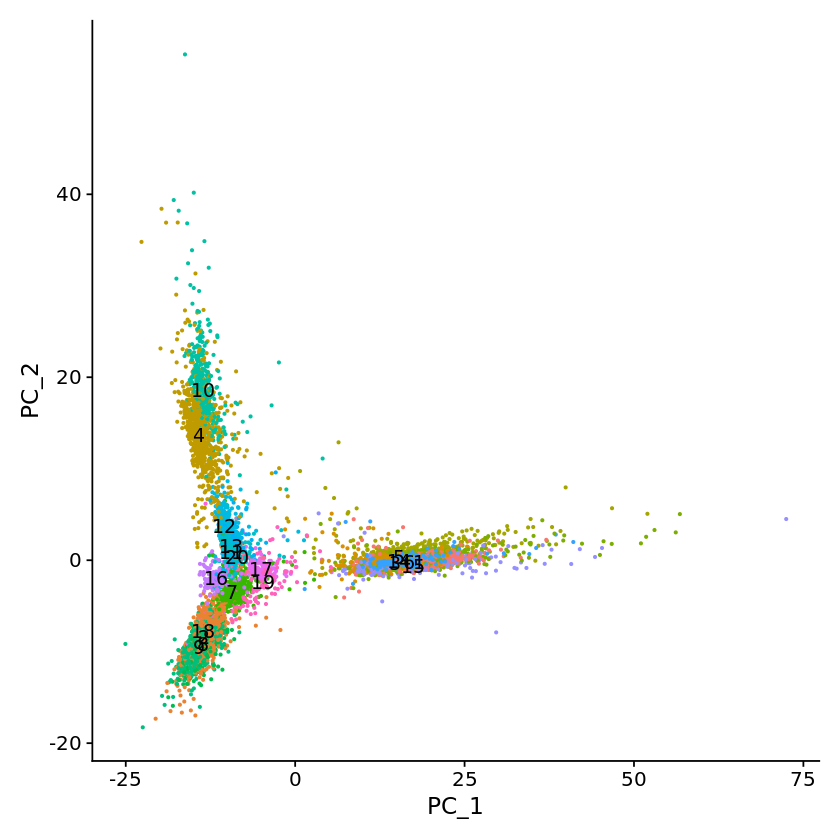

In [20]:
DimPlot(HumanLiverSeurat, reduction = "pca", label = TRUE, pt.size = 0.5) + NoLegend()

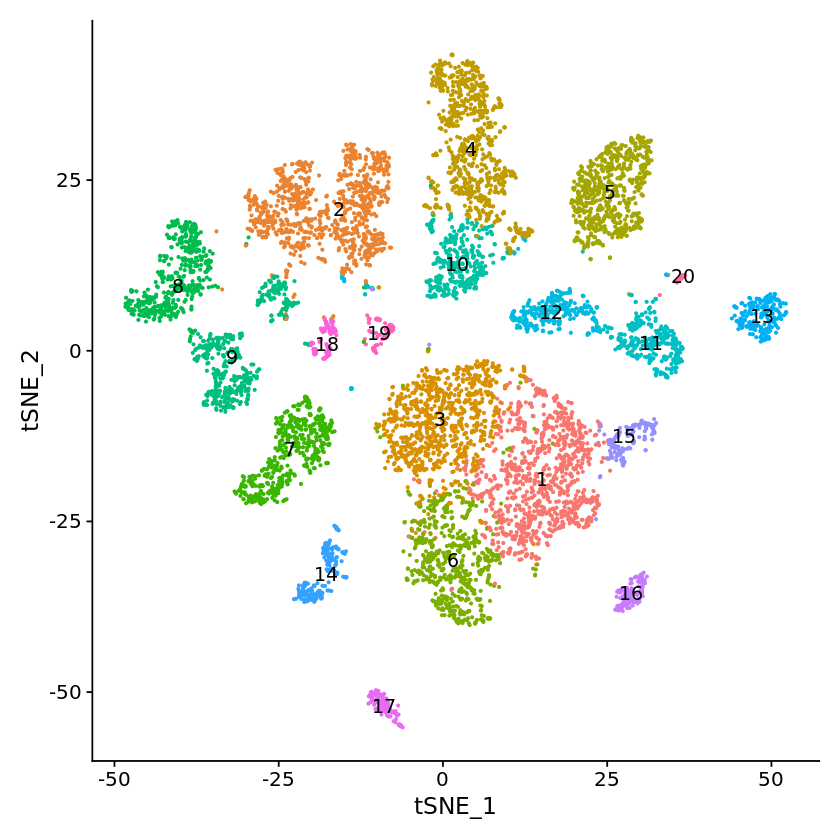

In [21]:
DimPlot(HumanLiverSeurat, reduction = "tsne", label = TRUE, pt.size = 0.5) + NoLegend()

In [11]:
library(HumanLiver)
viewHumanLiver()


Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pk

# Conversion to python-readable file

In [22]:
library(scClustViz)
library(Matrix)


Attaching package: ‘Matrix’

The following object is masked from ‘package:S4Vectors’:

    expand



In [12]:
HumanLiverSeurat

An object of class Seurat 
20007 features across 8444 samples within 1 assay 
Active assay: RNA (20007 features)
 2 dimensional reductions calculated: pca, tsne

In [10]:
HumanLiverSeurat[['RNA']]

Assay data with 20007 features for 8444 cells
Top 10 variable features:
 APOC3, APOA2, ORM1, ALB, HP, APOC1, SAA1, TTR, FGA, APOA1 

In [23]:
writeMM(HumanLiverSeurat[['RNA']]@data,"data/extract/HumanLiver.data.mm")

NULL

In [24]:
writeMM(HumanLiverSeurat[['RNA']]@counts,"data/extract/HumanLiver.data.counts.mm")

NULL

In [34]:
write.table(as.matrix(rownames(HumanLiverSeurat[['RNA']]@data)),'data/extract/HumanLiver.data.row',row.names=FALSE, col.names=FALSE)

In [35]:
write.table(as.matrix(colnames(HumanLiverSeurat[['RNA']]@data)),'data/extract/HumanLiver.data.col',row.names=FALSE, col.names=FALSE)

In [27]:
write.table(HumanLiverSeurat@meta.data,'data/extract/HumanLiver.metadata.tsv',row.names=TRUE, col.names=TRUE,sep='\t')
#write.table(HumanLiverSeurat@active.ident,'data/extract/HumanLiver.activeident.tsv',row.names=TRUE, col.names=TRUE,sep='\t')

In [40]:
write.table(ClusterNames(sCVdL$res.0.8),'data/extract/HumanLiver.clusterid2name.tsv',row.names=TRUE, col.names=FALSE,sep='\t')

In [48]:
write.table(attr(sCVdL$res.0.8@Clusters,"cellMarkers"),'data/extract/HumanLiver.clustername2marker.tsv',row.names=TRUE, col.names=FALSE,sep='\t')

ERROR: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 6, 3, 12, 9, 2, 5, 4


ERROR: Error in parse(text = x, srcfile = src): <text>:1:16: 예기치 않은 '['입니다
1: {'Hepatocytes':[
                   ^


# Deprecated

In [39]:
#slotNames(HumanLiverSeurat)

In [59]:
attr(sCVdL$res.0.8@Clusters,"cellMarkers")

$Hepatocytes
[1] "ALB"  "HAMP" "ARG1" "PCK1" "AFP"  "BCHE"

$LSECs
[1] "CALCRL" "CD32B"  "VWF"   

$Cholangiocytes
 [1] "KRT19"  "EPCAM"  "FXDY2"  "CLDN4"  "CLDN10" "SOX9"   "MMP7"   "CXCL1" 
 [9] "CFTR"   "TFF2"   "KRT7"   "CD24"  

$`Hepatic Stellate Cells`
[1] "ACTA2"  "COL1A1" "TAGLN"  "COL1A2" "COL3A1" "SPARC"  "RBP1"   "DCN"   
[9] "MYL9"  

$Macrophages
[1] "CD68"  "MARCO"

$`ab T cells`
[1] "CD2"  "CD3D" "TRAC" "IL32" "CD3E"

$`gd T cells`
[1] "NKG7"   "FCGR3A" "HOPX"   "GNLY"  

$`NK cells`
[1] "GZMK"  "KLRF1" "CCL3"  "CMC1" 

$`Plasma cells`
[1] "CD27"  "IGHG1"

$`Mature B cells`
[1] "MS4A1" "LTB"   "CD52"  "IGHD" 

$`Erythroid cells`
[1] "HBB"      "SLC25A37" "CA1"      "ALAS2"

In [46]:
sCVdL$res.0.8@Clusters

P1TLH_AAACCTGAGCAGCCTC_1 P1TLH_AAACCTGTCCTCATTA_1 P1TLH_AAACCTGTCTAAGCCA_1 
                      12                       17                       12 
P1TLH_AAACGGGAGTAGGCCA_1 P1TLH_AAACGGGGTTCGGGCT_1 P1TLH_AAAGCAACAGTAAGAT_1 
                      10                        2                        2 
P1TLH_AAAGCAAGTCGCGTGT_1 P1TLH_AAAGCAAGTGTTTGTG_1 P1TLH_AAAGCAAGTTGATTCG_1 
                       2                       10                        4 
P1TLH_AAAGTAGCAGACGTAG_1 P1TLH_AAAGTAGTCAAACGGG_1 P1TLH_AAAGTAGTCTGCGGCA_1 
                       8                        2                        4 
P1TLH_AAATGCCAGAGATGAG_1 P1TLH_AAATGCCTCATACGGT_1 P1TLH_AACACGTCAATCACAC_1 
                      12                        9                        8 
P1TLH_AACACGTCATTAACCG_1 P1TLH_AACCATGCAGCGAACA_1 P1TLH_AACCGCGTCCACGCAG_1 
                       2                        4                        2 
P1TLH_AACCGCGTCGTGGACC_1 P1TLH_AACGTTGAGGCTCAGA_1 P1TLH_AACGTTGCAGCCACCA_1 
                       2                       12                       10 
P1TLH_AACTCAGAGGCGTACA_1 P1TLH_AACTCAGCATCGTCGG_1 P1TLH_AACTCAGTCGGAGCAA_1 
                      10                       12                        2 
P1TLH_AACTCCCAGATCCCGC_1 P1TLH_AACTCTTCAGACAAGC_1 P1TLH_AACTCTTTCAACGAAA_1 
                       4                       14                        4 
P1TLH_AACTTTCCATACGCCG_1 P1TLH_AACTTTCGTTTGCATG_1 P1TLH_AAGCCGCAGCTAGTGG_1 
                       2                       12                        4 
P1TLH_AAGCCGCAGGGCACTA_1 P1TLH_AAGGAGCCATACAGCT_1 P1TLH_AAGGAGCGTCTCGTTC_1 
                      12                       12                        4 
P1TLH_AAGGAGCGTCTTGATG_1 P1TLH_AAGGCAGCAGCAGTTT_1 P1TLH_AAGGTTCAGCGAAGGG_1 
                       2                       12                        4 
P1TLH_AAGGTTCAGTGGACGT_1 P1TLH_AAGGTTCCAGCCACCA_1 P1TLH_AAGTCTGGTCTGGAGA_1 
                       4                        9                       12 
P1TLH_ACACCAAAGACAGACC_1 P1TLH_ACACCAACACAACGCC_1 P1TLH_ACACCAATCCTCAATT_1 
                       4                        4                        8 
P1TLH_ACACCCTAGCTGAACG_1 P1TLH_ACACCCTCACGGCCAT_1 P1TLH_ACACCGGAGGATGGAA_1 
                       2                       13                       14 
P1TLH_ACACTGACAGGGCATA_1 P1TLH_ACAGCCGAGATAGTCA_1 P1TLH_ACAGCCGAGGTCATCT_1 
                      18                       10                       12 
P1TLH_ACAGCCGCATCGTCGG_1 P1TLH_ACAGCCGTCAGGCGAA_1 P1TLH_ACAGCCGTCGGAGCAA_1 
                      14                       12                        4 
P1TLH_ACAGCTAAGCTGTTCA_1 P1TLH_ACAGCTAAGGAACTGC_1 P1TLH_ACAGCTATCAGTGCAT_1 
                       2                        2                       14 
P1TLH_ACAGCTATCGGTGTCG_1 P1TLH_ACATACGTCATAGCAC_1 P1TLH_ACATGGTCACATGACT_1 
                       2                       10                       10 
P1TLH_ACATGGTCATCCTTGC_1 P1TLH_ACATGGTGTCATCGGC_1 P1TLH_ACCAGTAAGCCTCGTG_1 
                       4                        8                       12 
P1TLH_ACCAGTAAGCGCCTCA_1 P1TLH_ACCAGTAAGGATGTAT_1 P1TLH_ACCAGTACACACGCTG_1 
                       9                        4                        4 
P1TLH_ACCAGTACACGAAAGC_1 P1TLH_ACCAGTATCTATCCTA_1 P1TLH_ACCGTAACACAACTGT_1 
                      12                       12                        4 
P1TLH_ACCTTTACAGCATGAG_1 P1TLH_ACCTTTAGTCCGAATT_1 P1TLH_ACGAGCCTCATAACCG_1 
                       2                       10                        4 
P1TLH_ACGAGGAGTGCGAAAC_1 P1TLH_ACGATACTCAGGATCT_1 P1TLH_ACGATGTGTTGTGGCC_1 
                      14                       10                       10 
P1TLH_ACGCAGCGTAAGGATT_1 P1TLH_ACGCAGCTCTCGCATC_1 P1TLH_ACGCCAGAGACAGACC_1 
                      12                       12                        8 
P1TLH_ACGCCAGCACTCGACG_1 P1TLH_ACGCCAGTCTATCCTA_1 P1TLH_ACGCCGACACAAGTAA_1 
                       2                       12                       12 
P1TLH_ACGCCGAGTAAGTGGC_1 P1TLH_ACGGAGAAGATATACG_

In [45]:
attributes(sCVdL$res.0.8)

In [42]:
attr(sCVdL$res.0.8)

ERROR: Error in attr(sCVdL$res.0.8): either 2 or 3 arguments are required


In [41]:
ClusterNames(sCVdL$res.0.8)

1                        2                        3 
           "Hepatocytes"             "ab T cells"            "Hepatocytes" 
                       4                        5                        6 
           "Macrophages"            "Hepatocytes"            "Hepatocytes" 
                       7                        8                        9 
          "Plasma cells"               "NK cells"             "gd T cells" 
                      10                       11                       12 
           "Macrophages"                  "LSECs"                  "LSECs" 
                      13                       14                       15 
                 "LSECs"            "Hepatocytes"            "Hepatocytes" 
                      16                       17                       18 
        "Mature B cells"         "Cholangiocytes"             "gd T cells" 
                      19                       20 
       "Erythroid cells" "Hepatic Stellate Cells"

In [ ]:
slotNames(HumanLiverSeurat)

In [ ]:
head(HumanLiverSeurat@active.ident)

In [ ]:
sCVdL

In [ ]:
Clusters(HumanLiverSeurat)

In [ ]:
library(scClustViz)

In [ ]:
HumanLiverSeurat$Cluster

In [ ]:
head(HumanLiverSeurat@active.ident)

In [ ]:
library(scClustViz)

In [ ]:
ls()

In [ ]:
dim(sCVdL[1]);dim(sCVdL[2]);

In [ ]:
dim(sCVdL[1])

In [ ]:
HumanLiverSeurat

In [ ]:
slotNames(a)

In [ ]:
a.Data

In [ ]:
getClusters()

In [ ]:
a=getMD(HumanLiverSeurat)

In [ ]:
HumanLiverSeurat@meta.data

In [ ]:
HumanLiverSeurat@meta.data['res.0.8']

In [ ]:
HumanLiverSeurat@meta.data['orig.ident']

In [ ]:
HumanLiverSeurat@meta.data['orig.ident']

In [ ]:
help(TSNEPlot)

In [ ]:
TSNEPlot(object = HumanLiverSeurat)

In [ ]:
help(DimPlot)

In [ ]:
HumanLiverSeurat[['RNA']]

In [ ]:
head(HumanLiverSeurat@meta.data)

In [ ]:
HumanLiverSeurat@assays[1]

In [ ]:
HumanLiverSeurat@reductions

In [ ]:
slotNames(HumanLiverSeurat[['RNA']])

In [ ]:
slotNames(HumanLiverSeurat[['RNA']])

In [ ]:
HumanLiverSeurat[['RNA']]@scale.data

In [ ]:
HumanLiverSeurat@active.ident

In [ ]:
slotNames(HumanLiverSeurat)

In [ ]:
slotNames(HumanLiverSeurat)

In [ ]:
HumanLiverSeurat@active.ident

In [ ]:
slotNames(HumanLiverSeurat@assays$RNA)

In [ ]:
a=HumanLiverSeurat[['RNA']]@counts

In [ ]:
head(log10(100000*a[,2]/sum(a[,2])))

In [ ]:
HumanLiverSeurat[['RNA']]@data

In [ ]:
HumanLiverSeurat[['RNA']]@var.features

In [ ]:
head(HumanLiverSeurat@meta.data)

In [ ]:
slotNames(HumanLiverSeurat[['RNA']])

In [ ]:
rna_data=HumanLiverSeurat[['RNA']]@data
rna_counts=HumanLiverSeurat[['RNA']]@counts

In [ ]:
class(rna_data);class(rna_count)

In [ ]:
rna_data

In [ ]:
require("org.Hs.eg.db")

In [ ]:
sCVdL$res.0.8

In [ ]:
help(org.Hs.eg.db)

In [ ]:
HumanLiverSeurat@active.ident

In [ ]:
rna_data_nonsparse=as.matrix(rna_data)

In [ ]:
rna_data_nonsparse

In [ ]:
object.size(rna_data)

In [ ]:
object.size(rna_data_nonsparse)

In [ ]:
write.table(rna_data_nonsparse, file="mymatrix.tsv", row.names=TRUE, col.names=TRUE)

In [ ]:
slotNames(HumanLiverSeurat[['RNA']])

In [ ]:
object.size(rna_data)

In [ ]:
class(rna_data)

In [ ]:
dim(rna_data)

In [ ]:
rna_data

In [ ]:
HumanLiverSeurat.data

In [ ]:
HumanLiverSeurat@meta.data$res.0.8

In [ ]:
sCVdL[1]

In [ ]:
Clusters(sCVdL)